In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

#Library for Data Visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [4]:
# for col in df.columns:
#     print(col)
for idx, col in enumerate(df.columns, start=1):
    print(f"{idx}. {col}")

1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


In [5]:
attrition_counts = df['Attrition'].value_counts()
attrition_counts

Attrition
No     1233
Yes     237
Name: count, dtype: int64

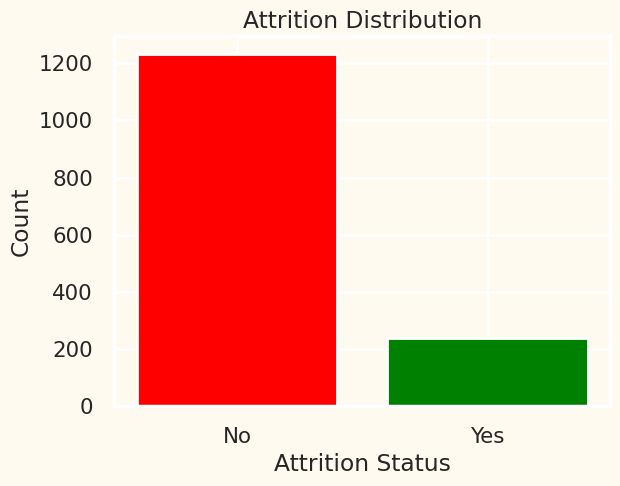

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df
# For example, you might have used something like:
# df = pd.read_csv('your_file.csv')

# Count occurrences of 'Yes' (sacked) and 'No' (not sacked) in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plotting
plt.bar(attrition_counts.index, attrition_counts.values, color=['red', 'green'])
plt.title('Attrition Distribution')
plt.xlabel('Attrition Status')
plt.ylabel('Count')

# Display the plot
plt.show()


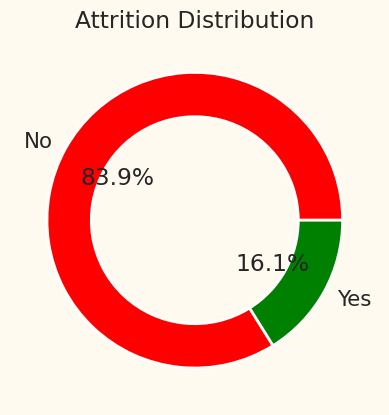

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df
# For example, you might have used something like:
# df = pd.read_csv('your_file.csv')

# Count occurrences of 'Yes' (sacked) and 'No' (not sacked) in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plotting a donut chart
fig, ax = plt.subplots()
ax.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['red', 'green'], wedgeprops=dict(width=0.3))
ax.set_title('Attrition Distribution')
plt.show()


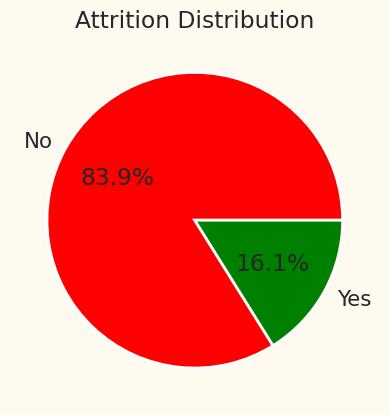

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame named df
# For example, you might have used something like:
# df = pd.read_csv('your_file.csv')

# Count occurrences of 'Yes' (sacked) and 'No' (not sacked) in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plotting a pie chart
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Attrition Distribution')
plt.show()


In [9]:
print("dataset shape: ",df.shape)

dataset shape:  (1470, 35)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
import pandas as pd

# Assuming you have loaded your data into a DataFrame named df
# For example, you might have used something like:
# df = pd.read_csv('your_file.csv')

# Count numerical columns
numerical_columns_count = len(df.select_dtypes(include=['number']).columns)

# Count categorical columns
categorical_columns_count = len(df.select_dtypes(include=['object', 'category']).columns)

# Display the counts
print(f'Number of Numerical Columns: {numerical_columns_count}')
print(f'Number of Categorical Columns: {categorical_columns_count}')


Number of Numerical Columns: 26
Number of Categorical Columns: 9


In [12]:
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
1027   34        401                 1          3              1   
555    29       1090                10          3              1   
570    52        715                19          4              1   
1016   31        202                 8          3              1   
318    27       1220                 5          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
1027            1447                        4          86               2   
555              766                        4          83               3   
570              791                        4          41               3   
1016            1433                        1          34               2   
318              434                        3          85               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
1027         1                2           3294         3708   
555          1                2           2297        17967   
570          1                4           4258        26589   
1016         1                2           1261        22262   
318          1                2           2478        20938   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
1027                   5                 17                  3   
555                    1                 14                  3   
570                    0                 18                  3   
1016                   1                 12                  3   
318                    1                 12                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1027                         1             80                 1   
555                          4             80                 2   
570                          1             80                 1   
1016                         3             80                 0   
318                          2             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1027                  7                      2                2   
555                   2                      2                3   
570                   5                      3                3   
1016                  1                      3                4   
318                   4                      2                2   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1027               5                   4                        0   
555                2                   2                        2   
570                4                   3                        1   
1016               1                   0                        0   
318                4                   3                        1   

      YearsWithCurrManager  
1027                     2  
555                      2  
570                      2  
1016                     0  
318                      2

In [13]:
df.select_dtypes(include='O').sample(5)

Attrition     BusinessTravel              Department EducationField  \
207         No  Travel_Frequently  Research & Development        Medical   
886         No      Travel_Rarely  Research & Development        Medical   
1245        No  Travel_Frequently         Human Resources        Medical   
261         No         Non-Travel                   Sales  Life Sciences   
878         No         Non-Travel         Human Resources        Medical   

      Gender                JobRole MaritalStatus Over18 OverTime  
207   Female  Laboratory Technician        Single      Y       No  
886     Male     Research Scientist       Married      Y      Yes  
1245    Male        Human Resources       Married      Y       No  
261     Male        Sales Executive       Married      Y       No  
878     Male        Human Resources       Married      Y       No

In [14]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


In [15]:
import pandas as pd

# Assuming you have loaded your data into a DataFrame named df
# For example, you might have used something like:
# df = pd.read_csv('your_file.csv')

# Total number of missing values per column
missing_values_total = df.isnull().sum()

# Percentage of missing values per column
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Combine the total and percentage into a DataFrame for easier inspection
missing_data = pd.DataFrame({
    'Total Missing Values': missing_values_total,
    'Percentage of Missing Values': missing_values_percentage
})

# Display the missing data information
print(missing_data)


                          Total Missing Values  Percentage of Missing Values
Age                                          0                           0.0
Attrition                                    0                           0.0
BusinessTravel                               0                           0.0
DailyRate                                    0                           0.0
Department                                   0                           0.0
DistanceFromHome                             0                           0.0
Education                                    0                           0.0
EducationField                               0                           0.0
EmployeeCount                                0                           0.0
EmployeeNumber                               0                           0.0
EnvironmentSatisfaction                      0                           0.0
Gender                                       0                           0.0

In [16]:
round(df.describe().T,2)

count      mean      std     min      25%      50%  \
Age                       1470.0     36.92     9.14    18.0    30.00     36.0   
DailyRate                 1470.0    802.49   403.51   102.0   465.00    802.0   
DistanceFromHome          1470.0      9.19     8.11     1.0     2.00      7.0   
Education                 1470.0      2.91     1.02     1.0     2.00      3.0   
EmployeeCount             1470.0      1.00     0.00     1.0     1.00      1.0   
EmployeeNumber            1470.0   1024.87   602.02     1.0   491.25   1020.5   
EnvironmentSatisfaction   1470.0      2.72     1.09     1.0     2.00      3.0   
HourlyRate                1470.0     65.89    20.33    30.0    48.00     66.0   
JobInvolvement            1470.0      2.73     0.71     1.0     2.00      3.0   
JobLevel                  1470.0      2.06     1.11     1.0     1.00      2.0   
JobSatisfaction           1470.0      2.73     1.10     1.0     2.00      3.0   
MonthlyIncome             1470.0   6502.93  4707.96  1009.0  2911.00   4919.0   
MonthlyRate               1470.0  14313.10  7117.79  2094.0  8047.00  14235.5   
NumCompaniesWorked        1470.0      2.69     2.50     0.0     1.00      2.0   
PercentSalaryHike         1470.0     15.21     3.66    11.0    12.00     14.0   
PerformanceRating         1470.0      3.15     0.36     3.0     3.00      3.0   
RelationshipSatisfaction  1470.0      2.71     1.08     1.0     2.00      3.0   
StandardHours             1470.0     80.00     0.00    80.0    80.00     80.0   
StockOptionLevel          1470.0      0.79     0.85     0.0     0.00      1.0   
TotalWorkingYears         1470.0     11.28     7.78     0.0     6.00     10.0   
TrainingTimesLastYear     1470.0      2.80     1.29     0.0     2.00      3.0   
WorkLifeBalance           1470.0      2.76     0.71     1.0     2.00      3.0   
YearsAtCompany            1470.0      7.01     6.13     0.0     3.00      5.0   
YearsInCurrentRole        1470.0      4.23     3.62     0.0     2.00      3.0   
YearsSinceLastPromotion   1470.0      2.19     3.22     0.0     0.00      1.0   
YearsWithCurrManager      1470.0      4.12     3.57     0.0     2.00      3.0   

                               75%      max  
Age                          43.00     60.0  
DailyRate                  1157.00   1499.0  
DistanceFromHome             14.00     29.0  
Education                     4.00      5.0  
EmployeeCount                 1.00      1.0  
EmployeeNumber             1555.75   2068.0  
EnvironmentSatisfaction       4.00      4.0  
HourlyRate                   83.75    100.0  
JobInvolvement                3.00      4.0  
JobLevel                      3.00      5.0  
JobSatisfaction               4.00      4.0  
MonthlyIncome              8379.00  19999.0  
MonthlyRate               20461.50  26999.0  
NumCompaniesWorked            4.00      9.0  
PercentSalaryHike            18.00     25.0  
PerformanceRating             3.00      4.0  
RelationshipSatisfaction      4.00      4.0  
StandardHours                80.00     80.0  
StockOptionLevel              1.00      3.0  
TotalWorkingYears            15.00     40.0  
TrainingTimesLastYear         3.00      6.0  
WorkLifeBalance               3.00      4.0  
YearsAtCompany                9.00     40.0  
YearsInCurrentRole            7.00     18.0  
YearsSinceLastPromotion       3.00     15.0  
YearsWithCurrManager          7.00     17.0

In [17]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

In [18]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [19]:
df.describe(include="O").T
#like example 2 =yes/no ,gender=m/f

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [20]:
for column in df.select_dtypes(include='O').columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Attrition: ['Yes' 'No']
Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender: ['Female' 'Male']
Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in OverTime: ['Yes' 'No']


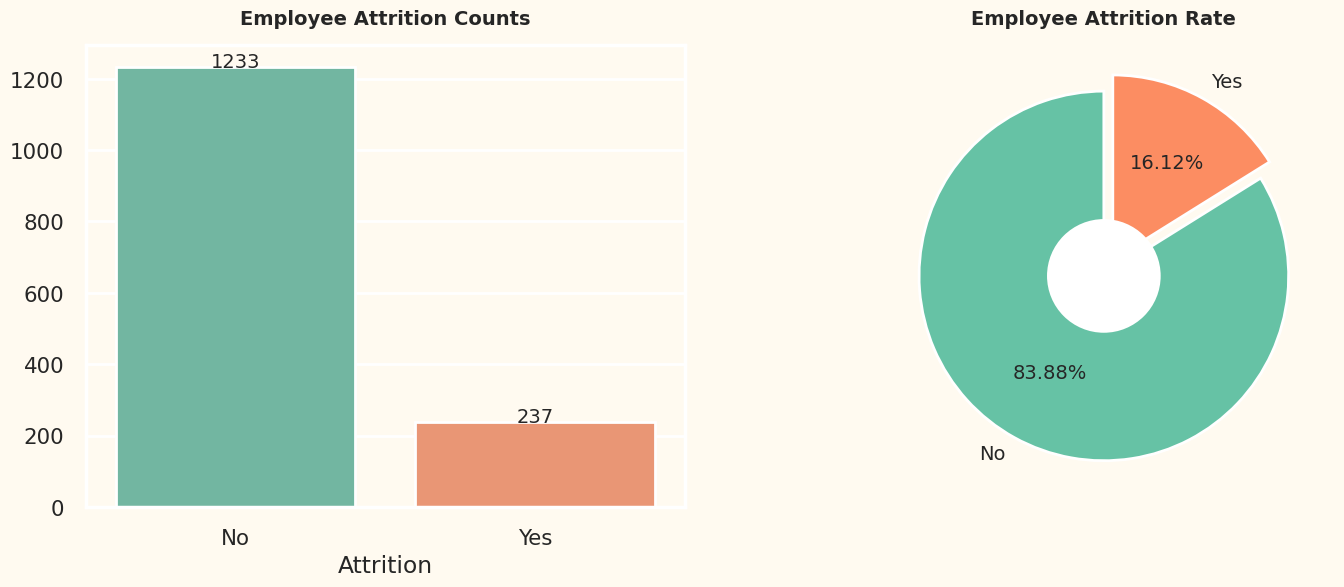

In [21]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

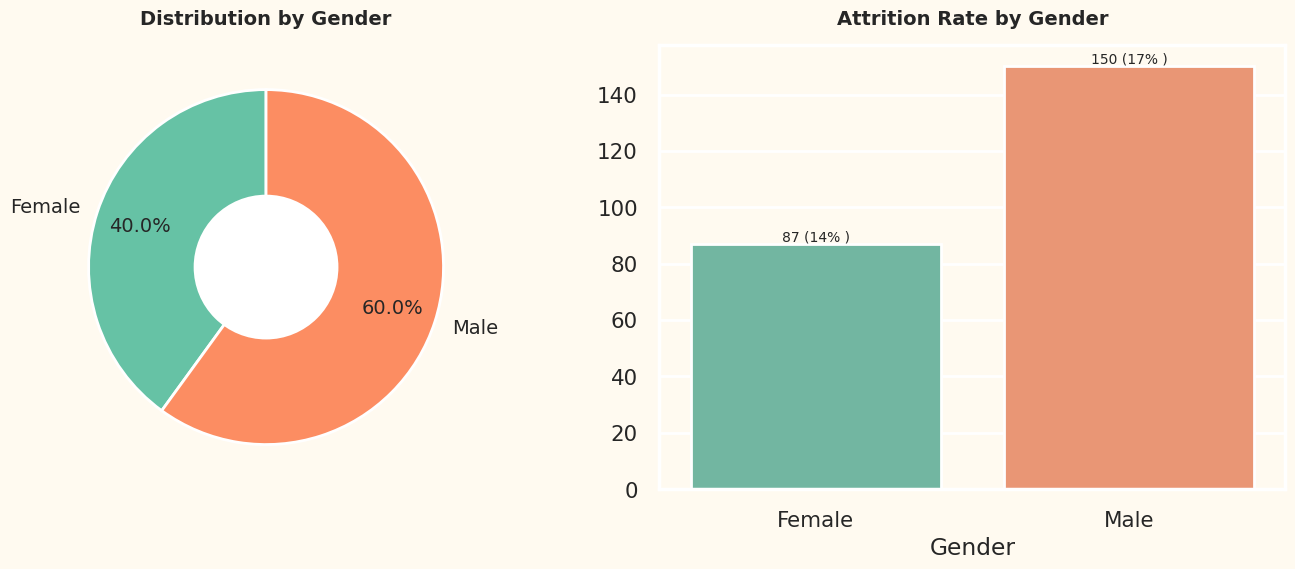

In [22]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()
pie_bar_plot(df, 'Gender', 'Attrition')

In [23]:
# Assuming your DataFrame is named 'df'
attrition_counts_by_marital_status = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()

print("Count of individuals with each marital status and their attrition status:")
print(attrition_counts_by_marital_status)


Count of individuals with each marital status and their attrition status:
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


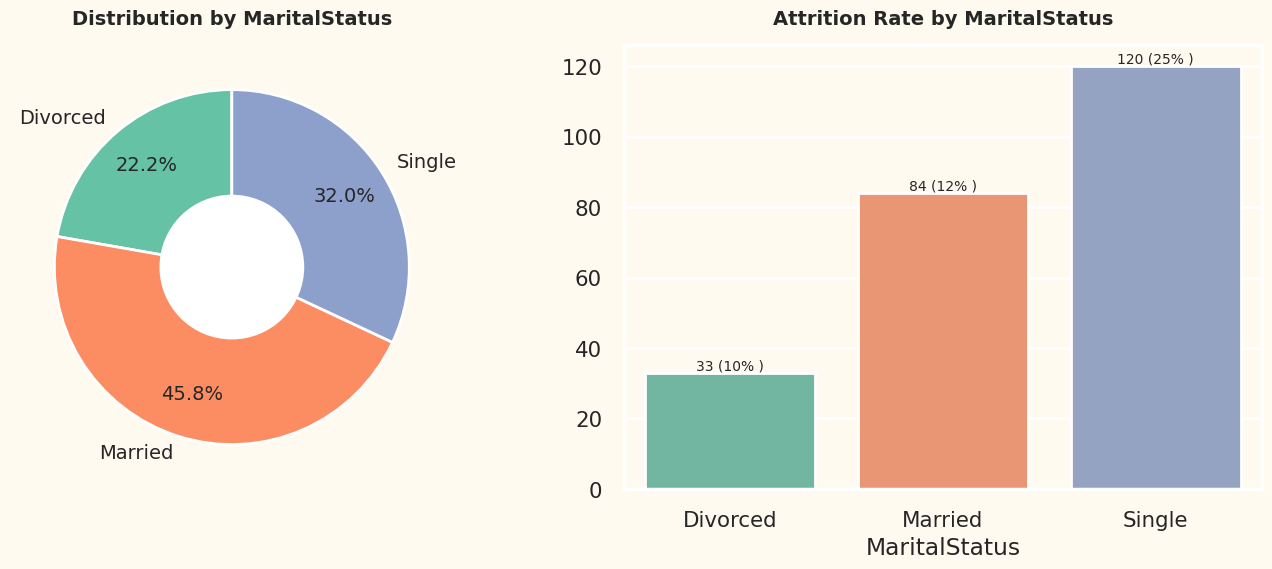

In [24]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

In [25]:
# Assuming your DataFrame is named 'df'
attrition_percentage_by_marital_status = df.groupby(['MaritalStatus', 'Attrition']).size().unstack()
attrition_percentage_by_marital_status = (attrition_percentage_by_marital_status.div(attrition_percentage_by_marital_status.sum(axis=1), axis=0) * 100).round(2)

print("Percentage of individuals with each marital status and their attrition status:")
print(attrition_percentage_by_marital_status)


Percentage of individuals with each marital status and their attrition status:
Attrition         No    Yes
MaritalStatus              
Divorced       89.91  10.09
Married        87.52  12.48
Single         74.47  25.53


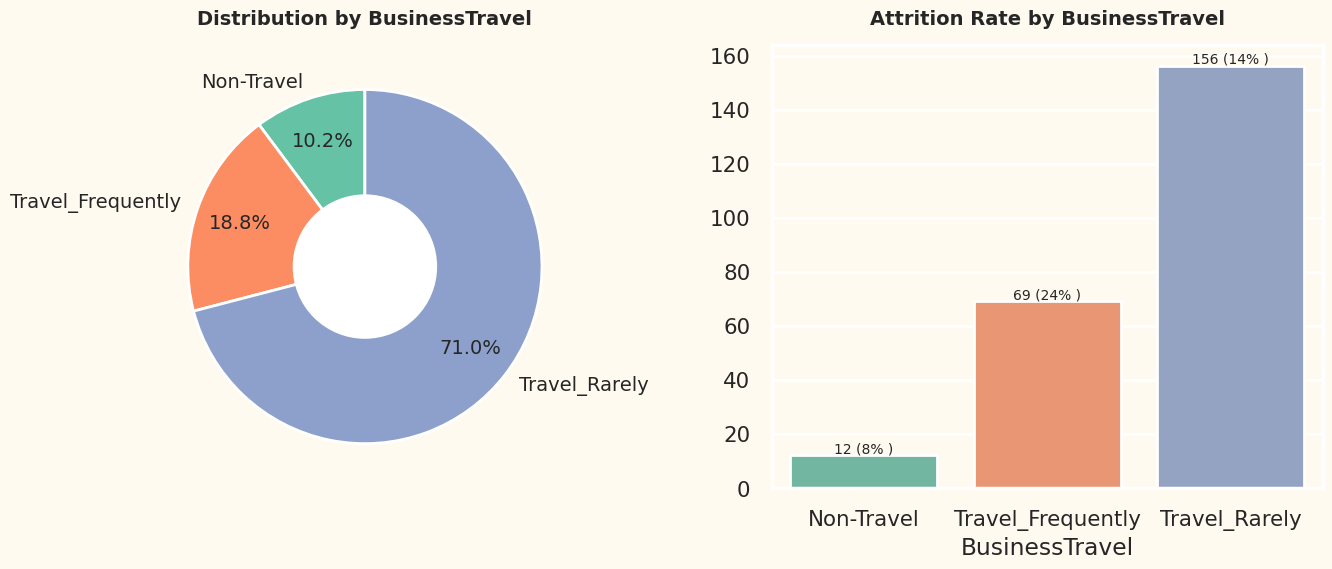

In [26]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

In [27]:
# Assuming your DataFrame is named 'df'
attrition_counts_by_business_travel = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
attrition_percentage_by_business_travel = (attrition_counts_by_business_travel.div(attrition_counts_by_business_travel.sum(axis=1), axis=0) * 100).round(2)

print("Count of individuals and percentage with each business travel status and their attrition status:")
print(attrition_counts_by_business_travel)
print("\nPercentage:")
print(attrition_percentage_by_business_travel)


Count of individuals and percentage with each business travel status and their attrition status:
Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

Percentage:
Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96


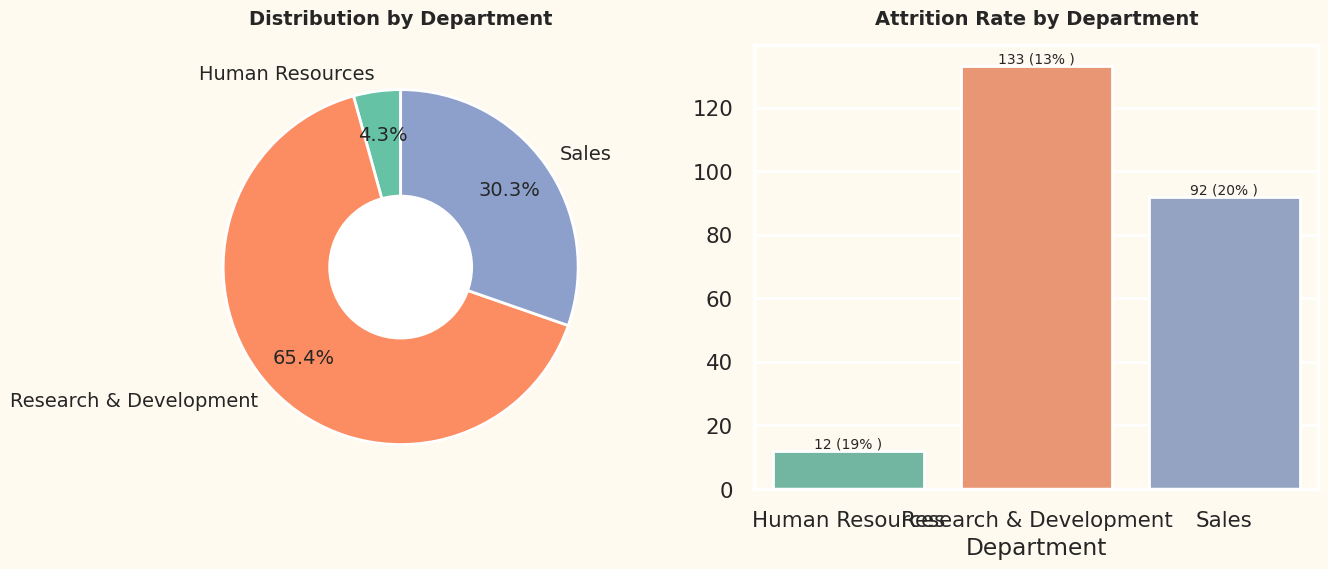

In [28]:
pie_bar_plot(df, 'Department', 'Attrition')

In [29]:
# Assuming your DataFrame is named 'df'
attrition_counts_by_department = df.groupby(['Department', 'Attrition']).size().unstack()
attrition_percentage_by_department = (attrition_counts_by_department.div(attrition_counts_by_department.sum(axis=1), axis=0) * 100).round(2)

print("Count of individuals and percentage with each department and their attrition status:")
print(attrition_counts_by_department)
print("\nPercentage:")
print(attrition_percentage_by_department)


Count of individuals and percentage with each department and their attrition status:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Percentage:
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63


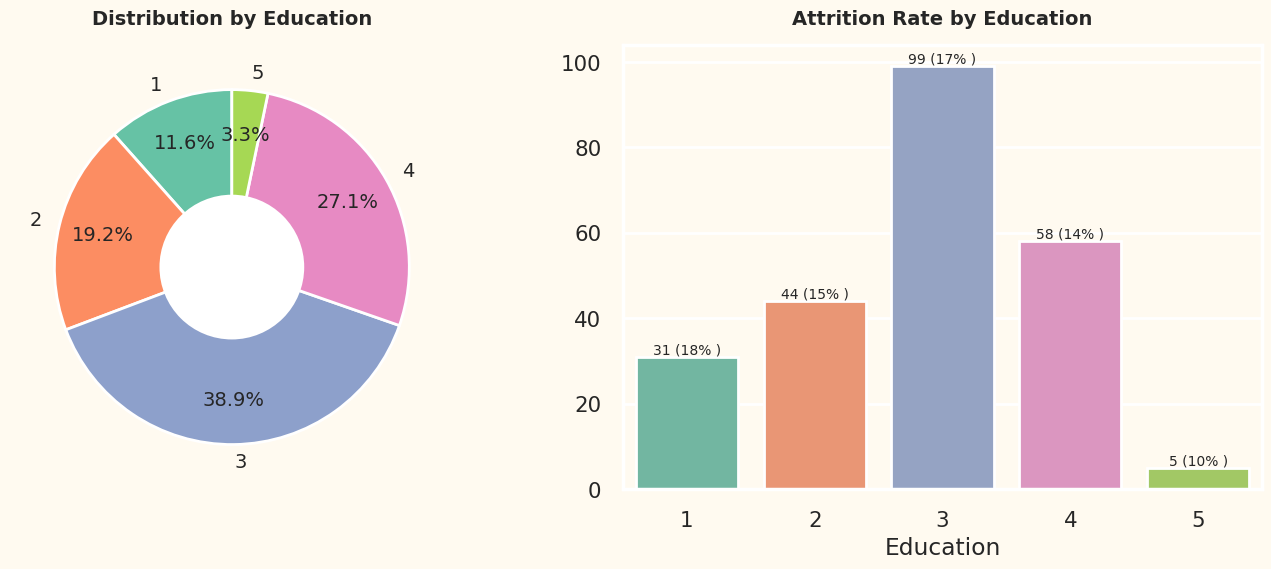

In [30]:
pie_bar_plot(df, 'Education', 'Attrition')

In [31]:
# Assuming your DataFrame is named 'df'
attrition_counts_by_education = df.groupby(['Education', 'Attrition']).size().unstack()
attrition_percentage_by_education = (attrition_counts_by_education.div(attrition_counts_by_education.sum(axis=1), axis=0) * 100).round(2)

print("Count of individuals and percentage with each education level and their attrition status:")
print(attrition_counts_by_education)
print("\nPercentage:")
print(attrition_percentage_by_education)


Count of individuals and percentage with each education level and their attrition status:
Attrition   No  Yes
Education          
1          139   31
2          238   44
3          473   99
4          340   58
5           43    5

Percentage:
Attrition     No    Yes
Education              
1          81.76  18.24
2          84.40  15.60
3          82.69  17.31
4          85.43  14.57
5          89.58  10.42


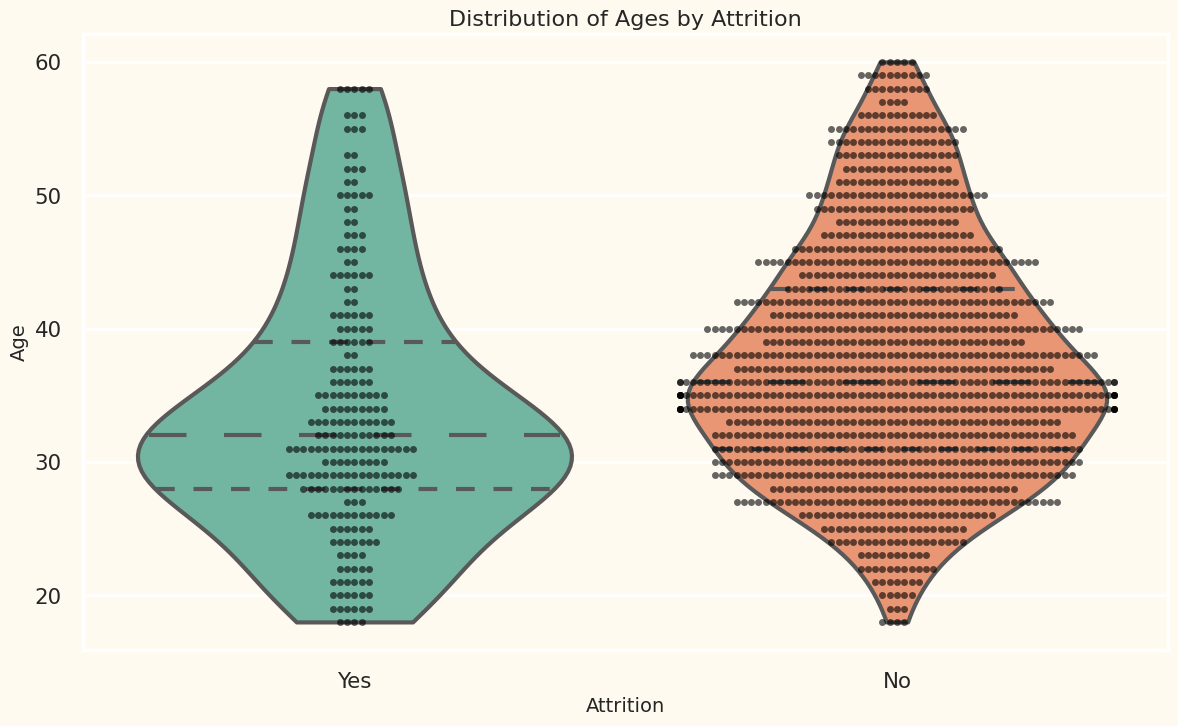

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(14, 8))

# Violin Plot with Swarm Plot
sns.violinplot(x='Attrition', y='Age', data=df, inner='quartile', palette='Set2', cut=0)
sns.swarmplot(x='Attrition', y='Age', data=df, color='black', alpha=0.6)

plt.title('Distribution of Ages by Attrition', fontsize=16)
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()


In [33]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    
    # Subplot 1: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plots
    plt.show()


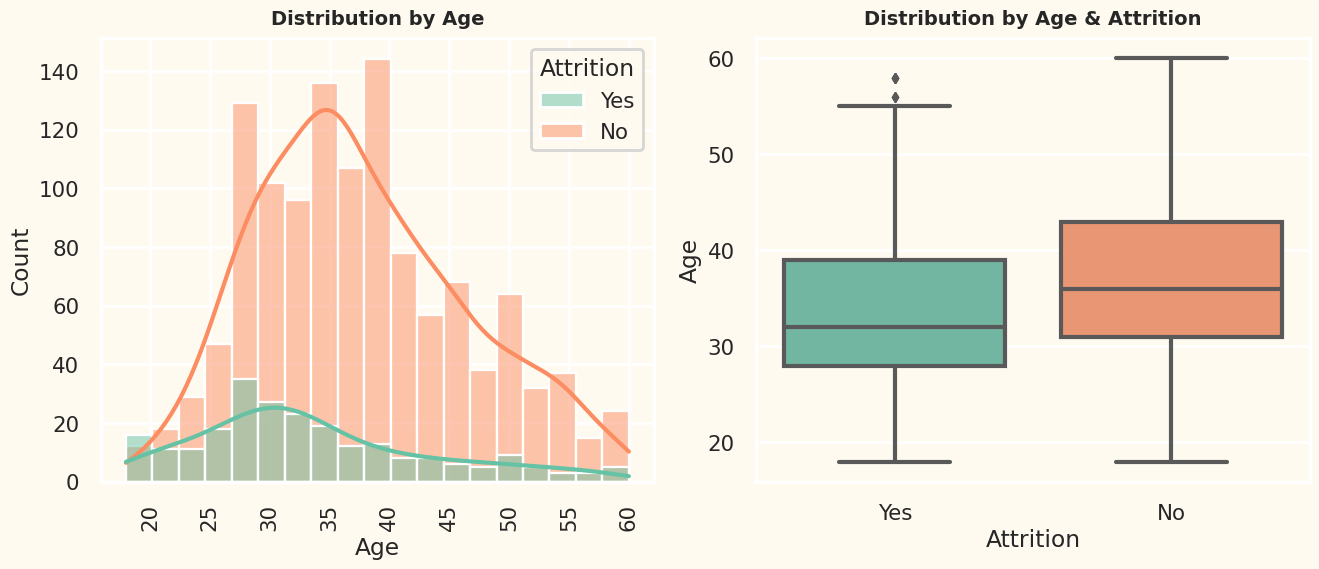

In [34]:
hist_with_hue(df, 'Age', 'Attrition')

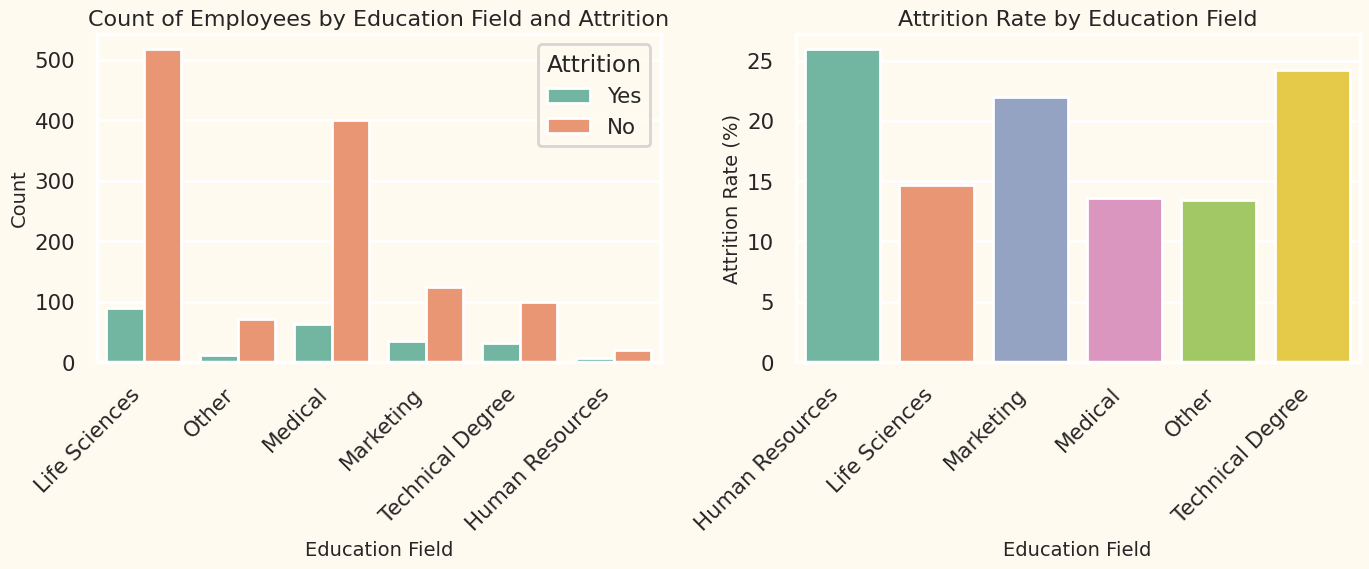

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def attrition_by_education_field(df):
    plt.figure(figsize=(14, 6))
    
    # Subplot 1: Count Plot
    plt.subplot(1, 2, 1)
    sns.countplot(x='EducationField', hue='Attrition', data=df, palette='Set2')
    plt.title('Count of Employees by Education Field and Attrition', fontsize=16)
    plt.xlabel('Education Field', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Subplot 2: Bar Plot for Attrition Rate
    plt.subplot(1, 2, 2)
    total_counts = df['EducationField'].value_counts()
    attrition_counts = df[df['Attrition'] == 'Yes']['EducationField'].value_counts()
    attrition_rate = (attrition_counts / total_counts * 100).sort_index()
    
    sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='Set2')
    plt.title('Attrition Rate by Education Field', fontsize=16)
    plt.xlabel('Education Field', fontsize=14)
    plt.ylabel('Attrition Rate (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plots
    plt.show()

# Example usage
attrition_by_education_field(df)


In [36]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


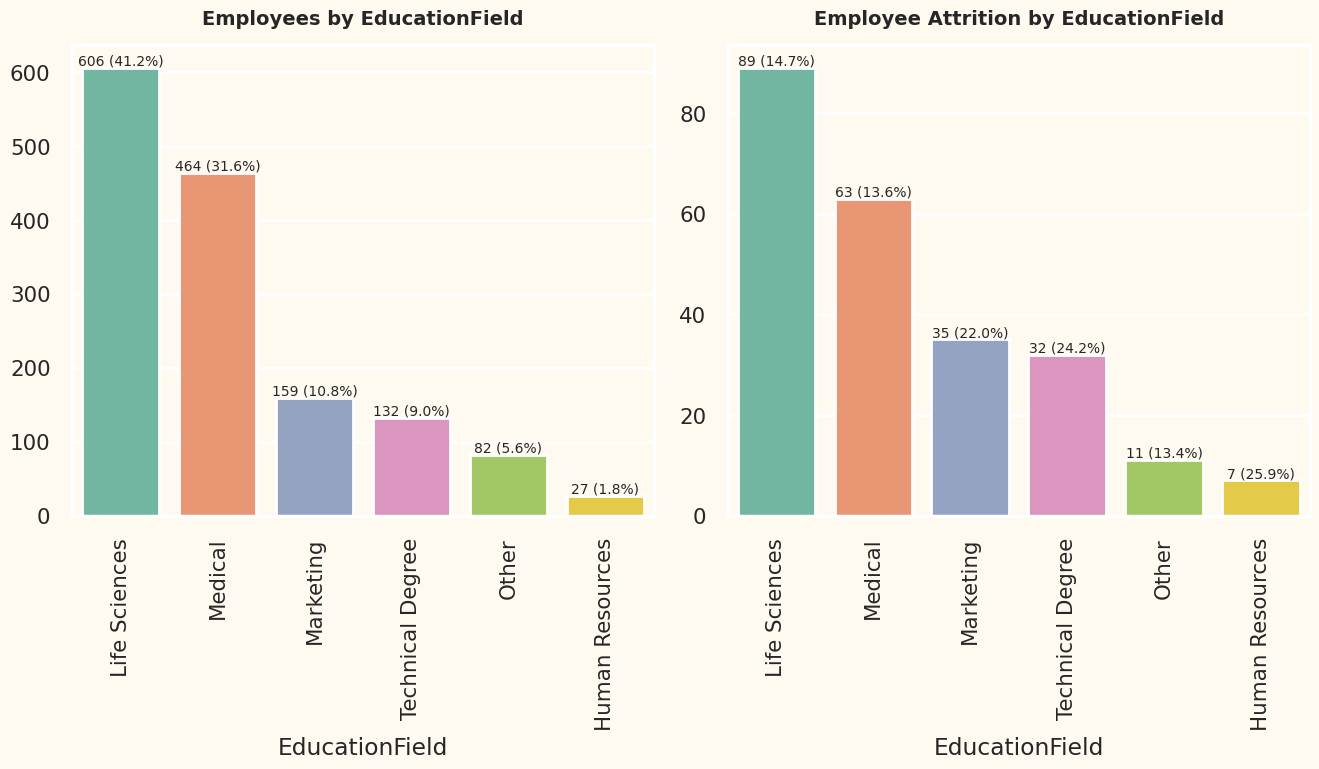

In [37]:
count_percent_plot(df, 'EducationField', 'Attrition')

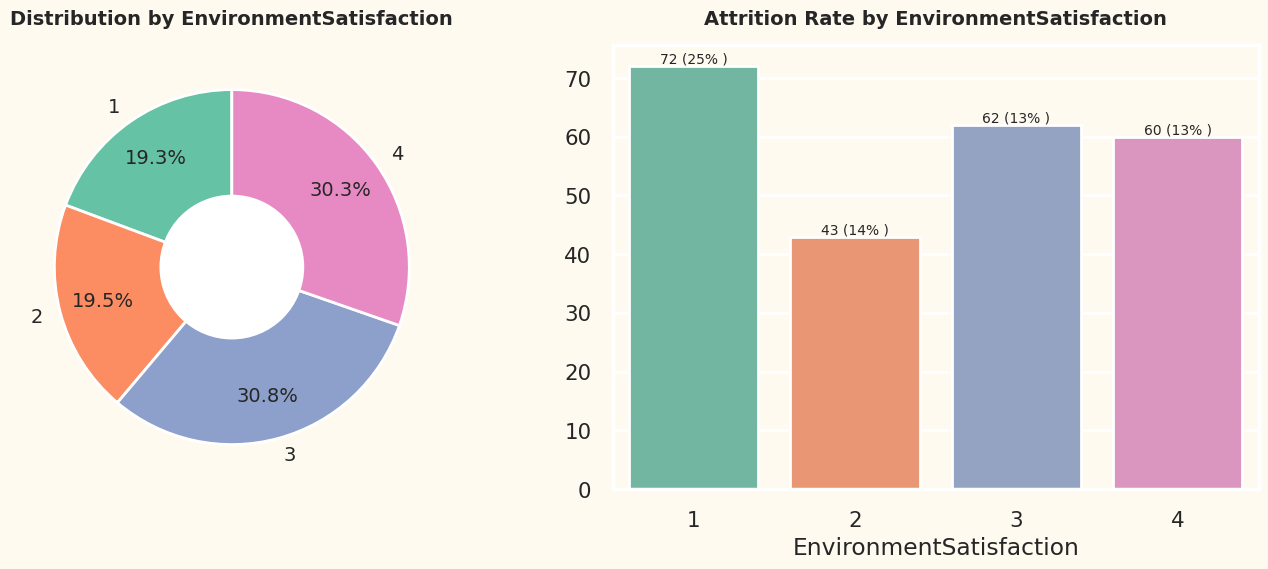

In [38]:
pie_bar_plot(df, 'EnvironmentSatisfaction', 'Attrition')

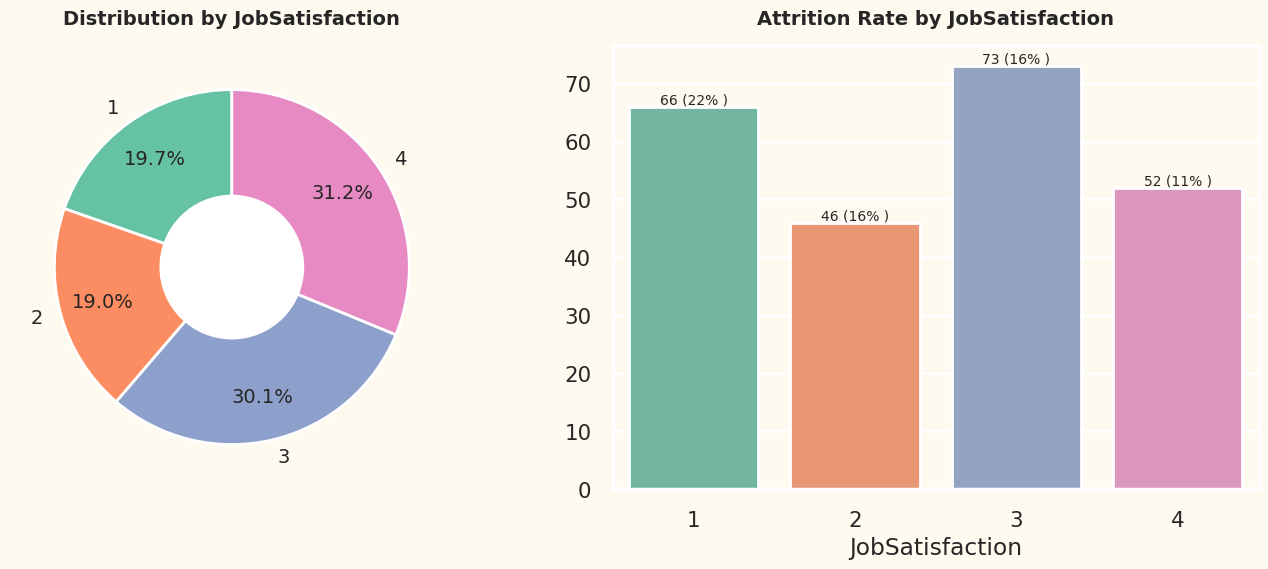

In [39]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

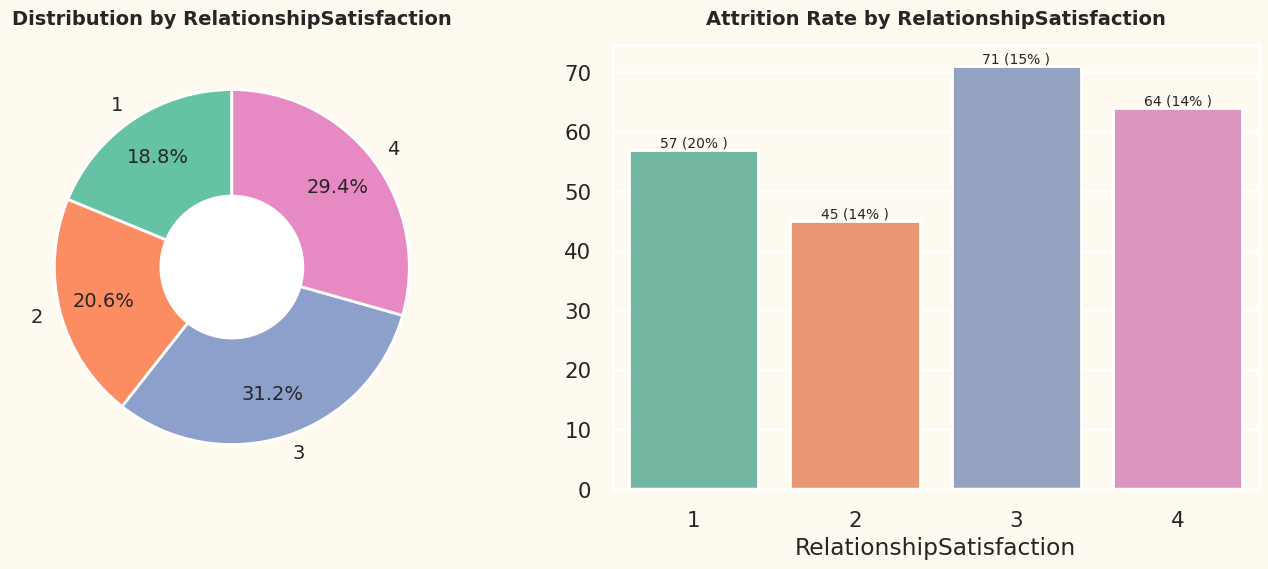

In [40]:
pie_bar_plot(df, 'RelationshipSatisfaction', 'Attrition')

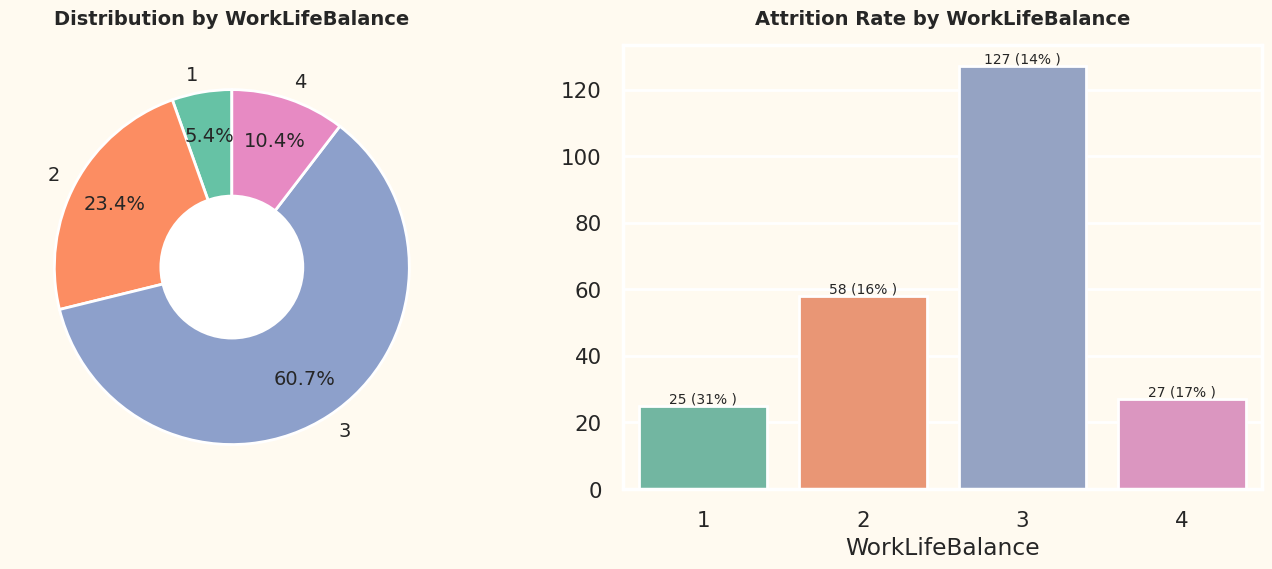

In [41]:
pie_bar_plot(df, 'WorkLifeBalance', 'Attrition')

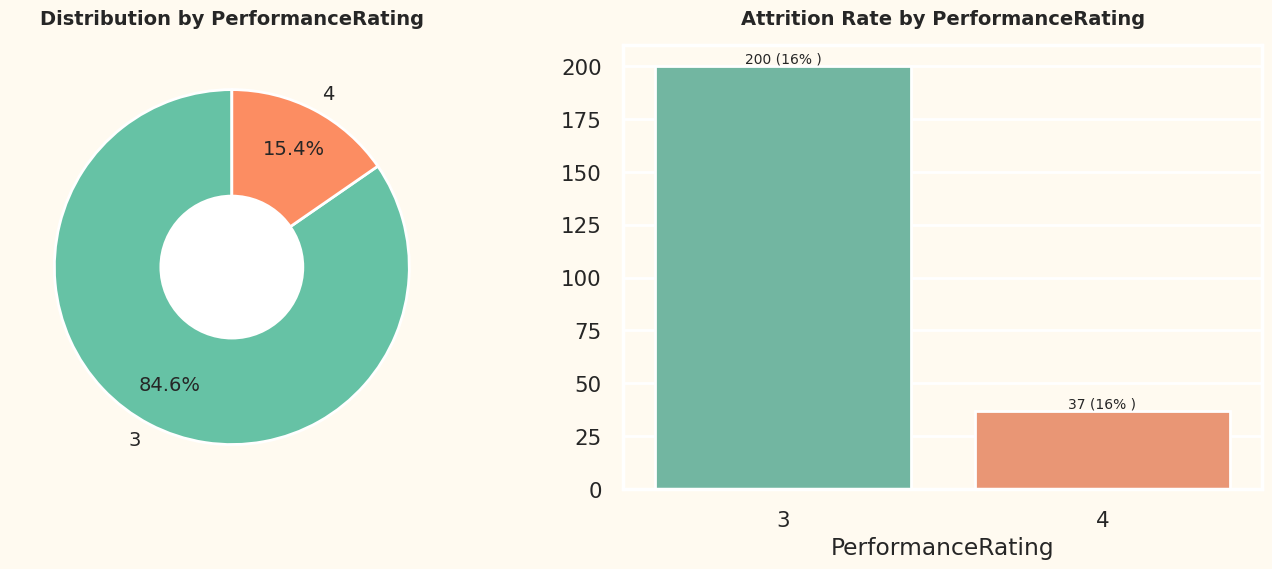

In [42]:
pie_bar_plot(df, 'PerformanceRating', 'Attrition')

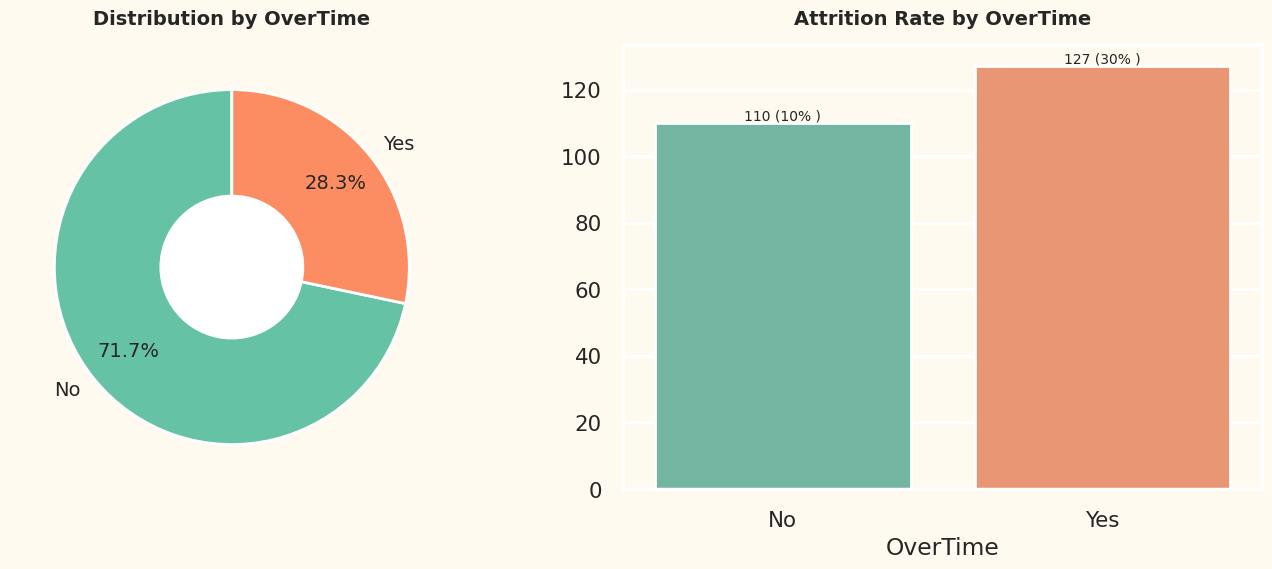

In [43]:
pie_bar_plot(df, 'OverTime', 'Attrition')

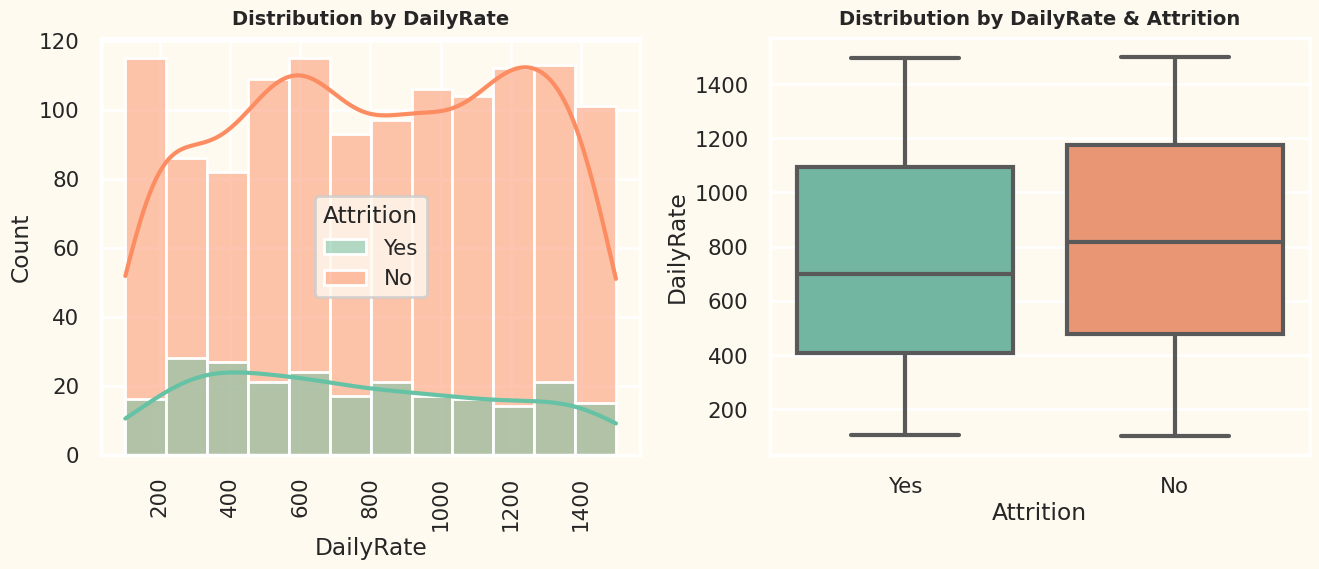

In [44]:
hist_with_hue(df, 'DailyRate', 'Attrition')

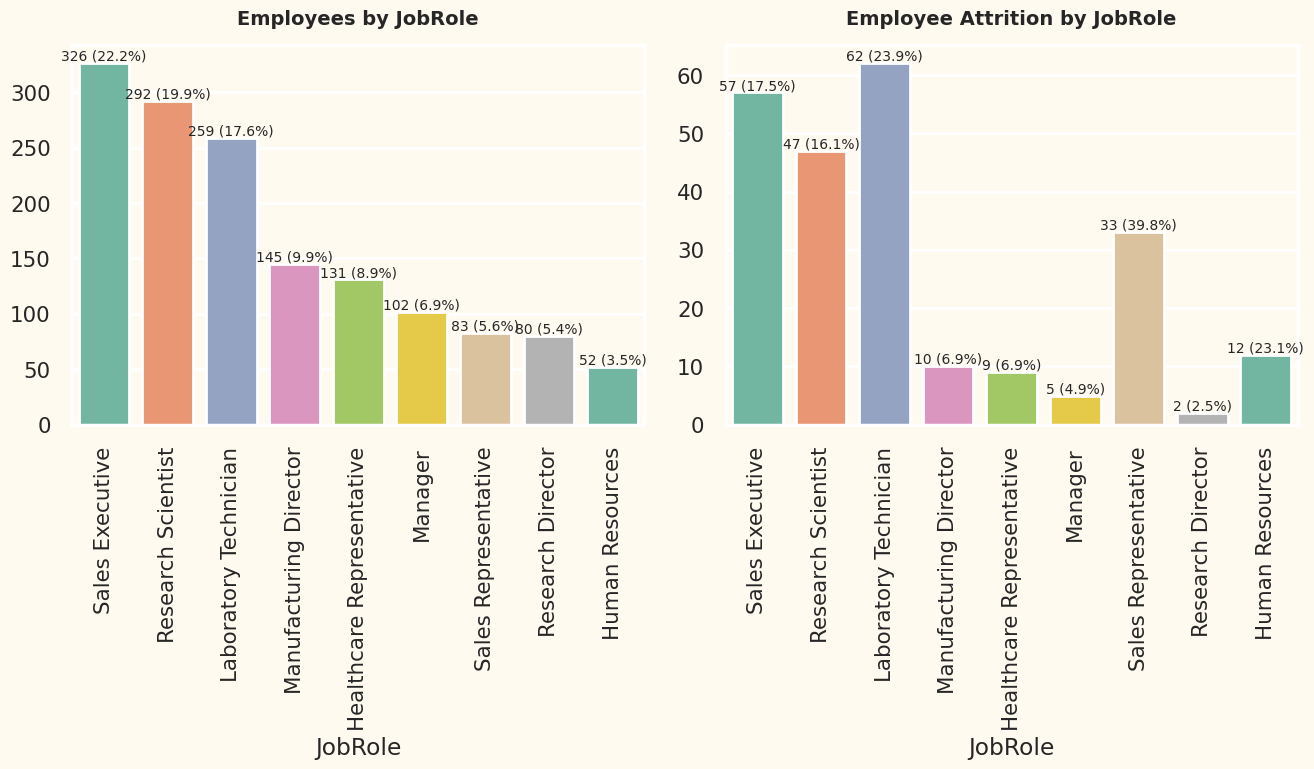

In [45]:
count_percent_plot(df, 'JobRole', 'Attrition')

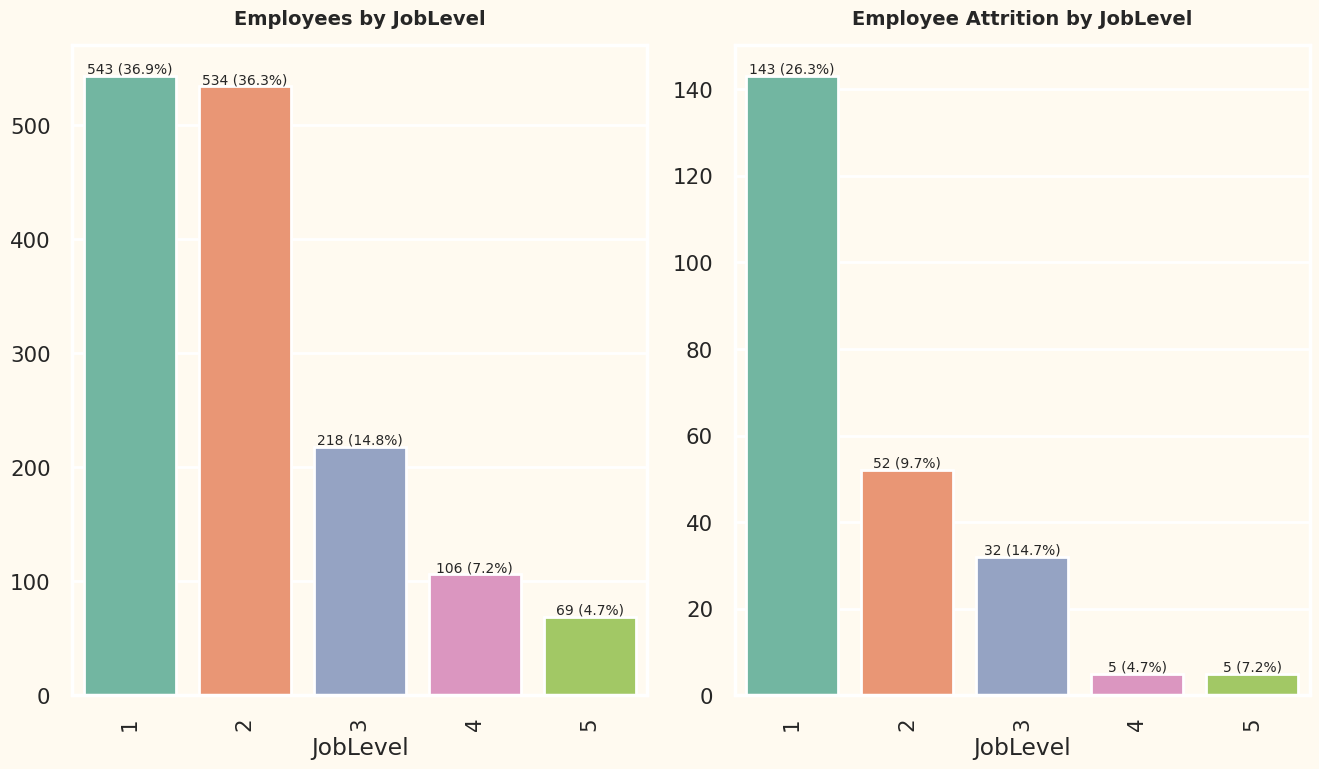

In [46]:
count_percent_plot(df, 'JobLevel', 'Attrition')

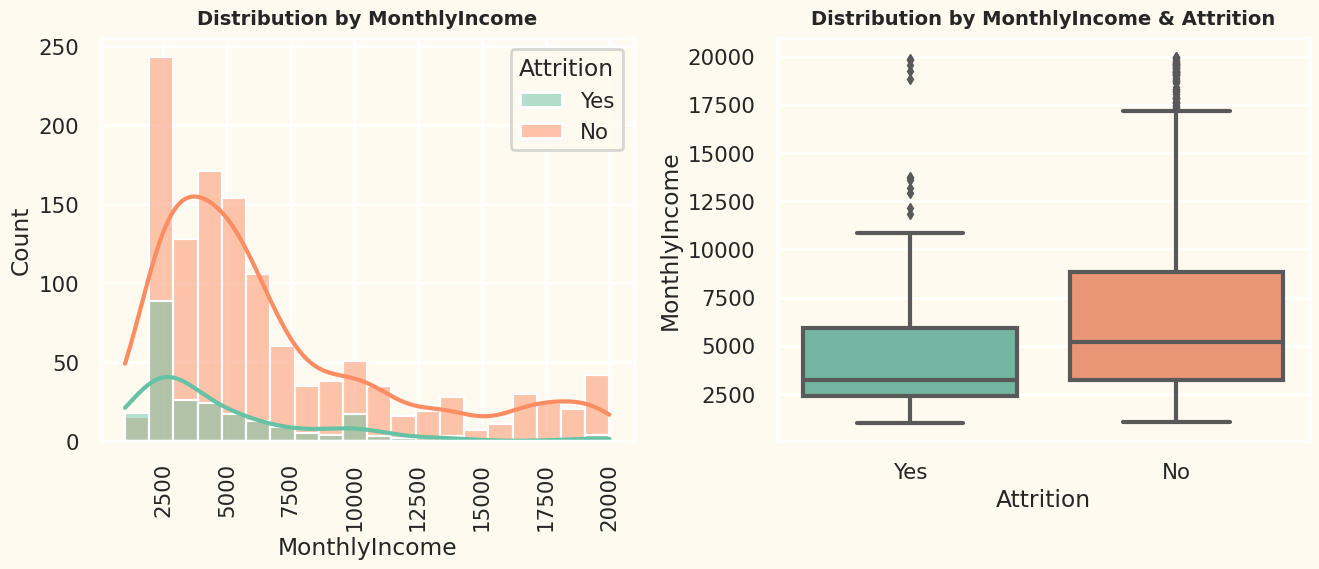

In [47]:
hist_with_hue(df, 'MonthlyIncome', 'Attrition')

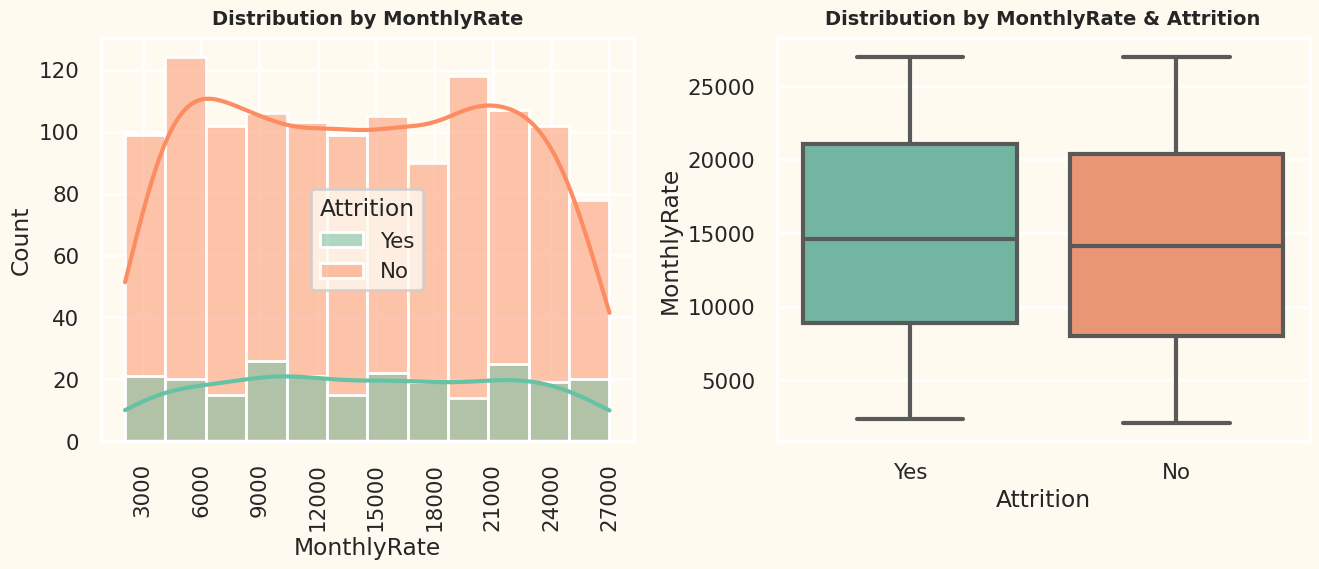

In [48]:
hist_with_hue(df, 'MonthlyRate', 'Attrition')

In [49]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",df["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [50]:
df["DistanceFromHome"].describe().to_frame().T
#there are lot many so its 29 so we have to do in groups to analyze properly.

count      mean       std  min  25%  50%   75%   max
DistanceFromHome  1470.0  9.192517  8.106864  1.0  2.0  7.0  14.0  29.0

In [51]:
print(df['DistanceFromHome'])


0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64


In [52]:
# Define the bin edges for the groups
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# Cuttinf the DistaanceFromHome column into groups
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

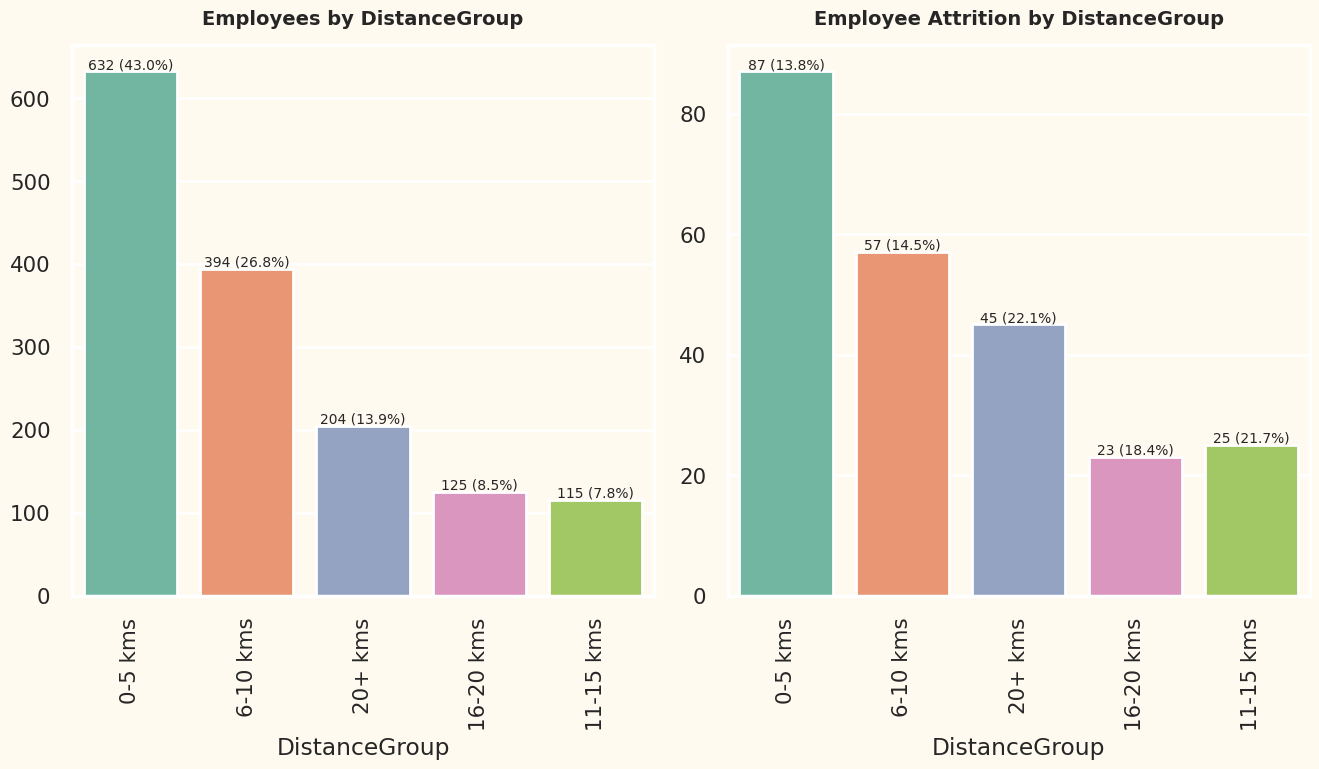

In [53]:
count_percent_plot(df, 'DistanceGroup', 'Attrition')

In [54]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",df["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [55]:
df["NumCompaniesWorked"].describe().to_frame().T

count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [56]:
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

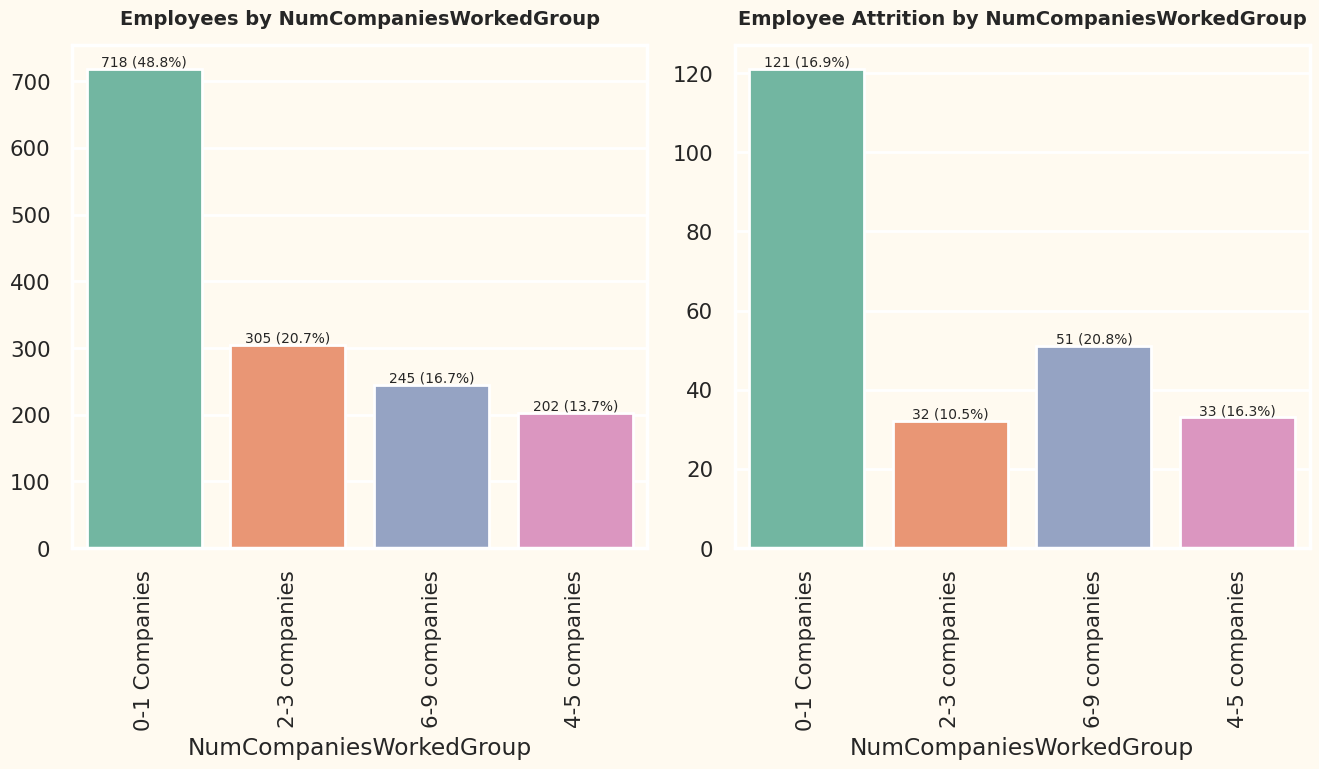

In [57]:
count_percent_plot(df, 'NumCompaniesWorkedGroup', 'Attrition')

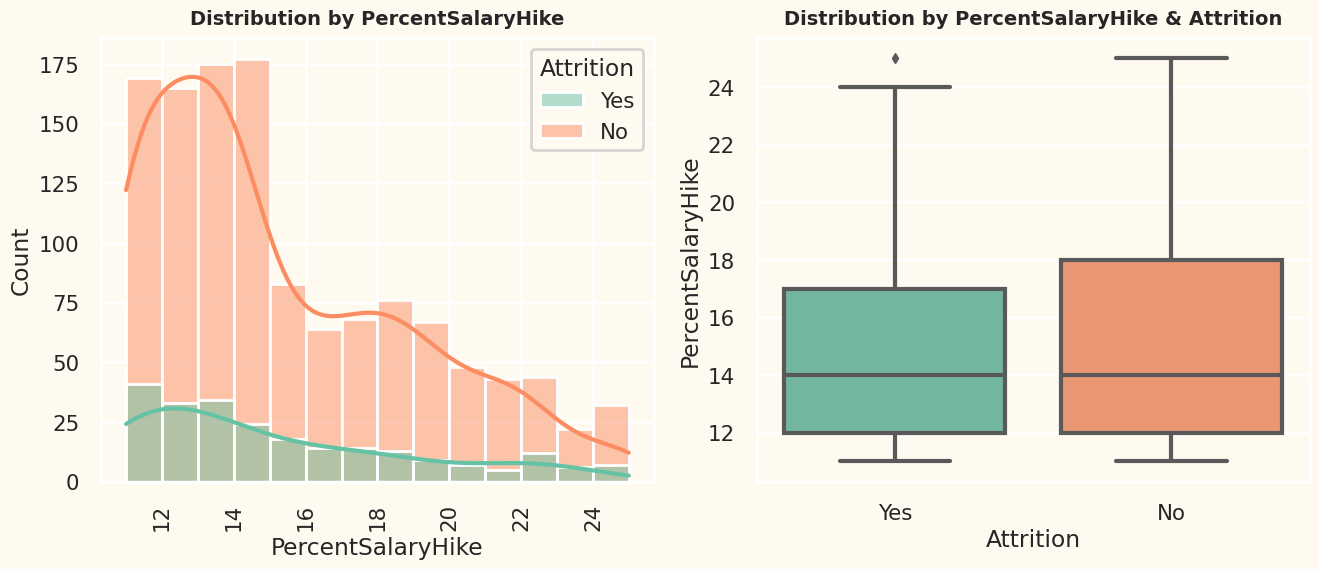

In [58]:
hist_with_hue(df, 'PercentSalaryHike', 'Attrition')

In [59]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",df["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [60]:
df["TotalWorkingYears"].describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [61]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

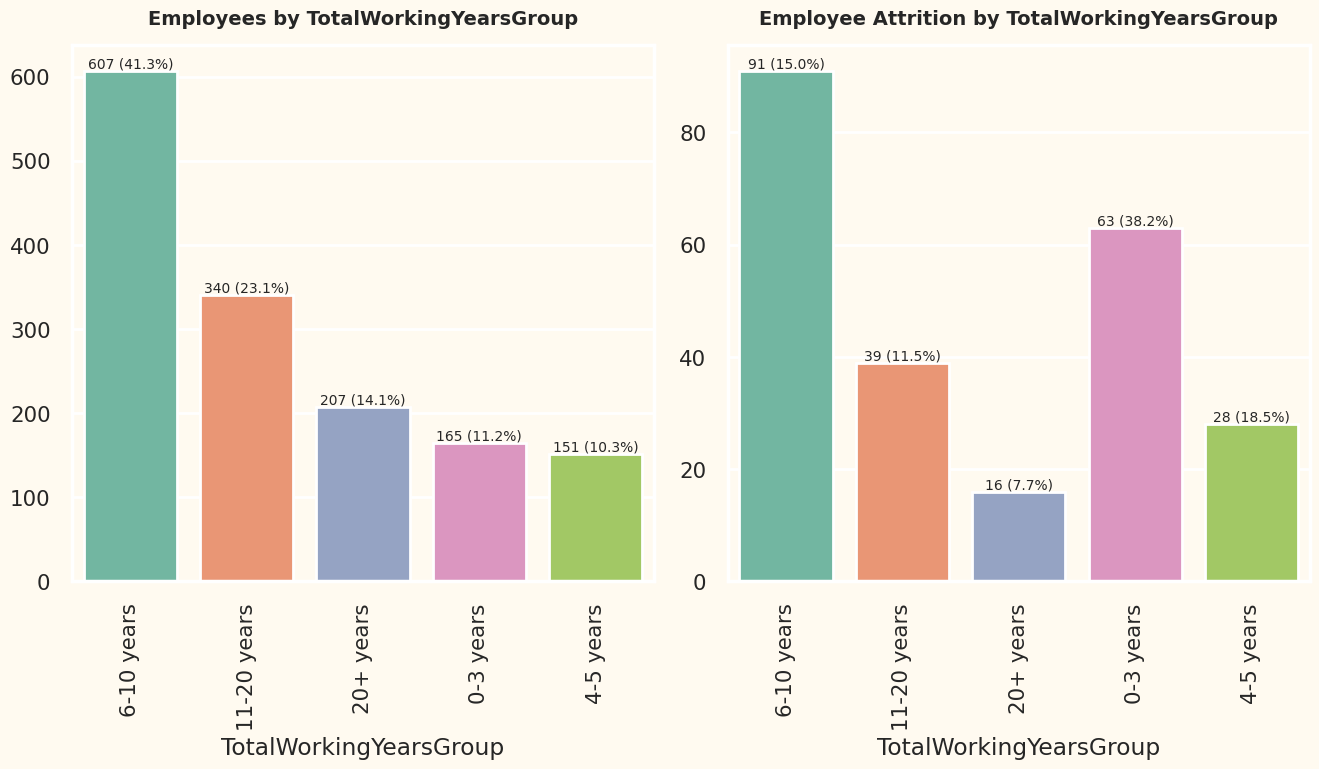

In [62]:
count_percent_plot(df, 'TotalWorkingYearsGroup', 'Attrition')

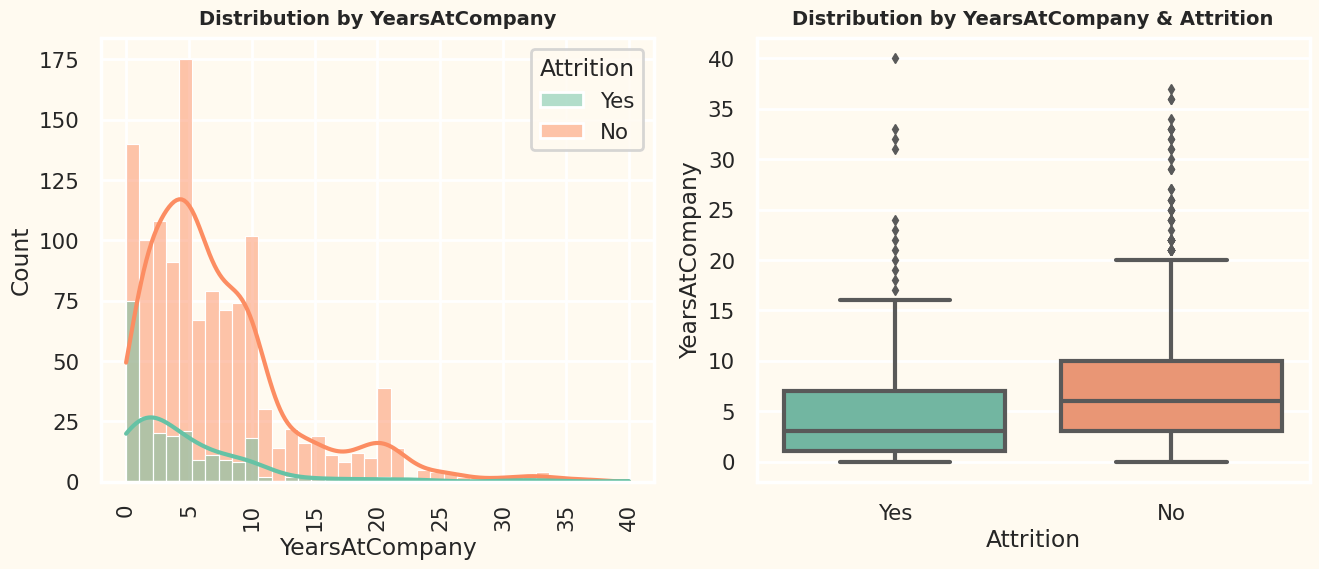

In [63]:
hist_with_hue(df, 'YearsAtCompany', 'Attrition')

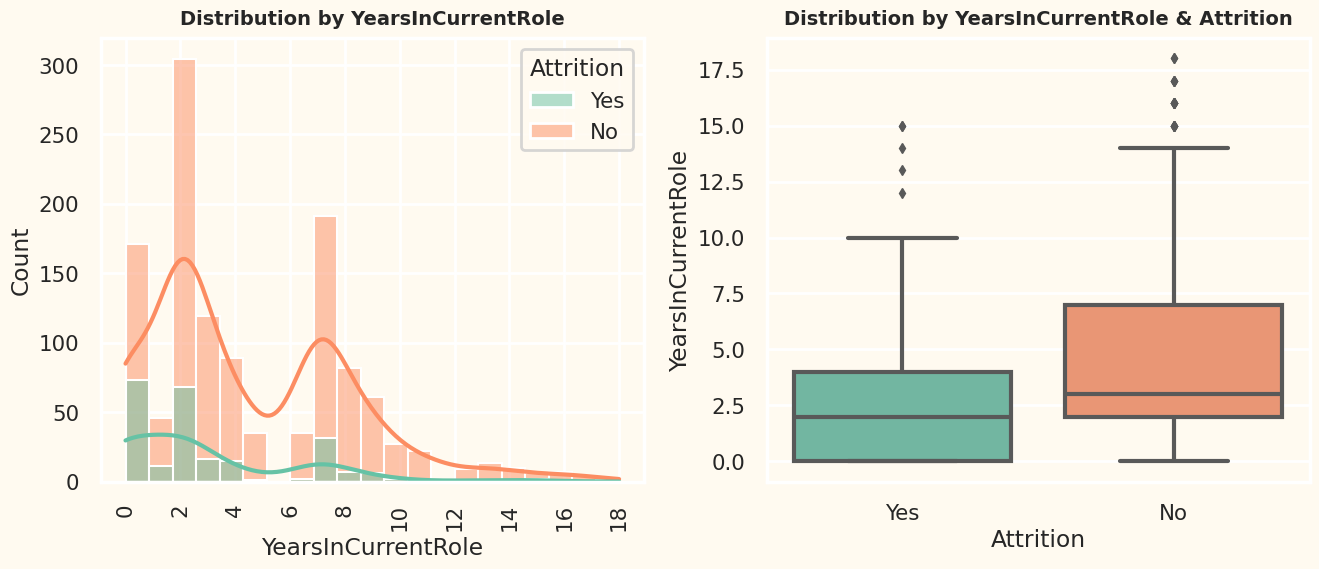

In [64]:
hist_with_hue(df, 'YearsInCurrentRole', 'Attrition')

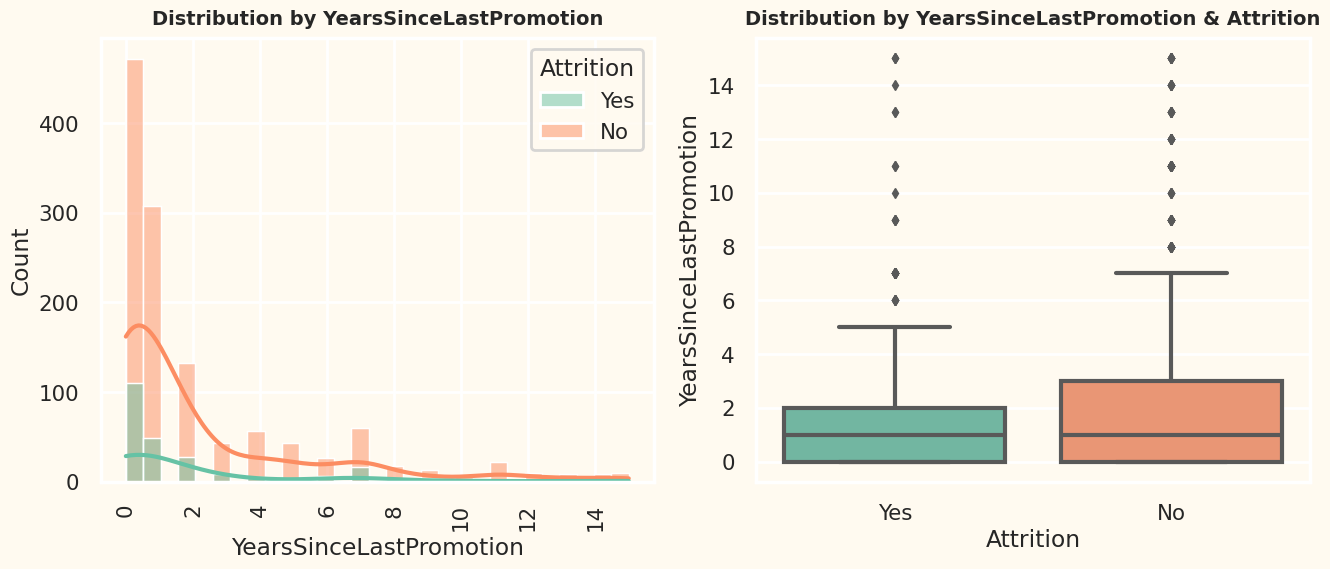

In [65]:
hist_with_hue(df, 'YearsSinceLastPromotion', 'Attrition')

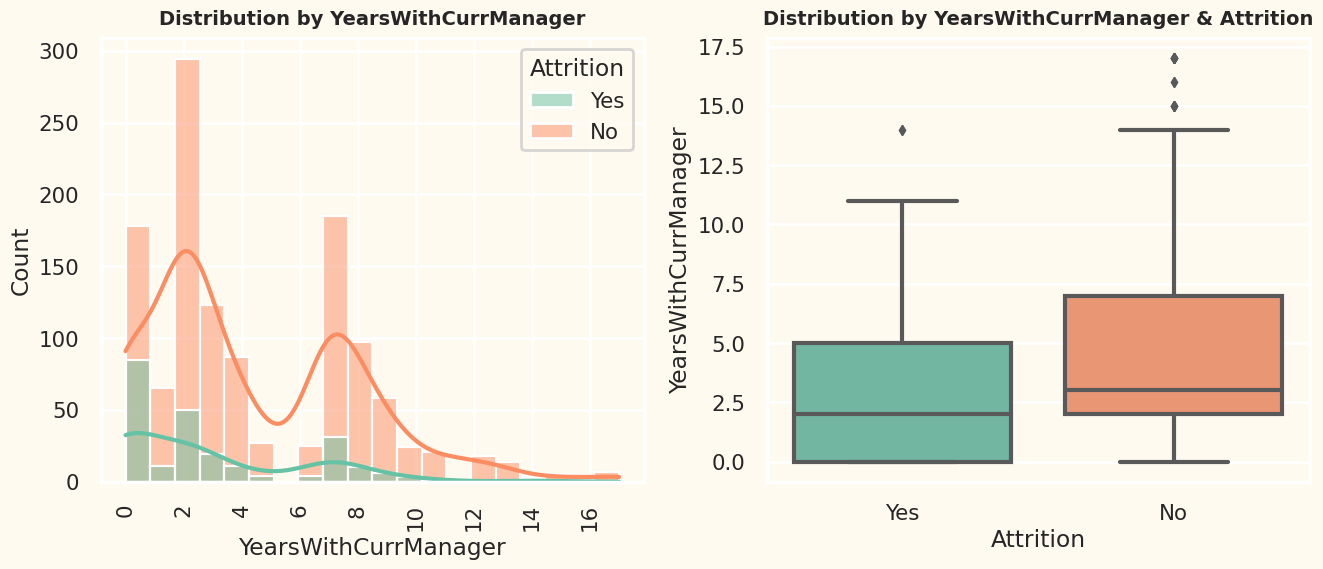

In [66]:
hist_with_hue(df, 'YearsWithCurrManager', 'Attrition')

In [67]:
num_cols = df.select_dtypes(np.number).columns

In [68]:
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [69]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

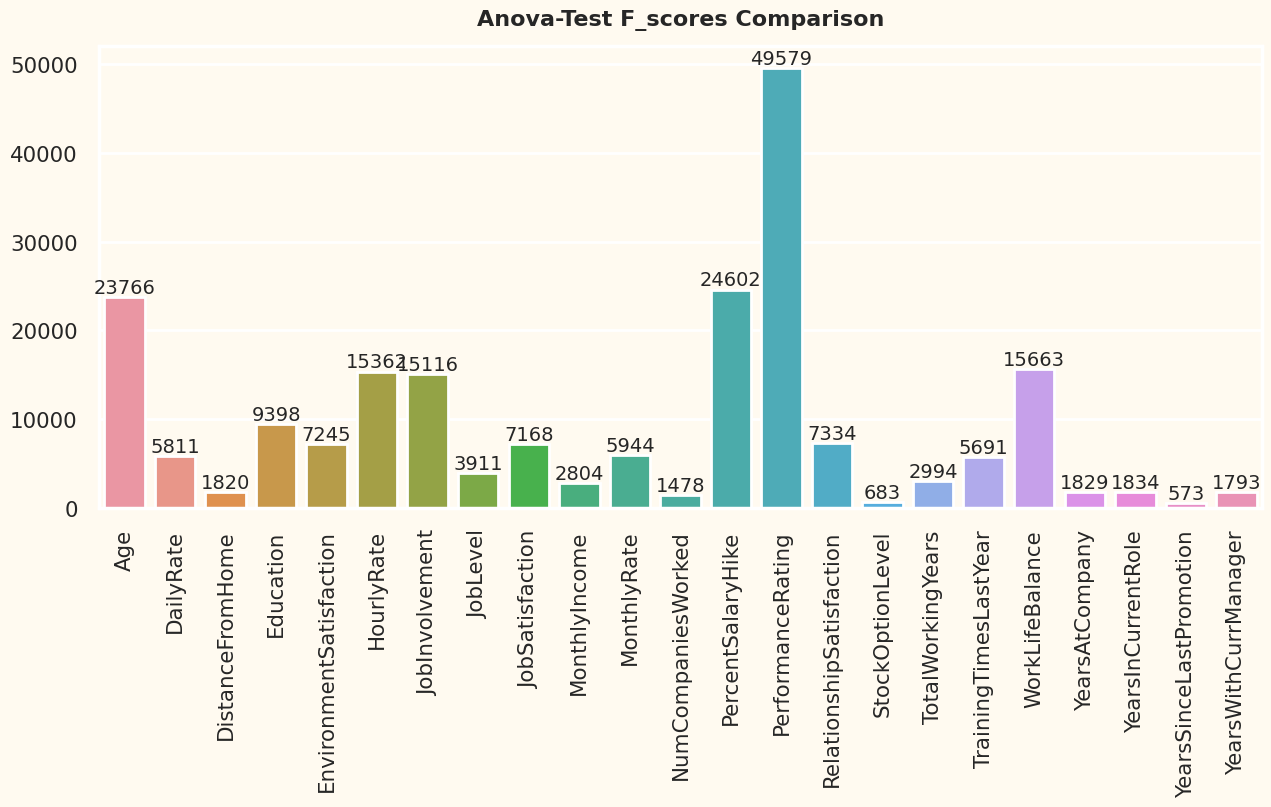

In [70]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()
# Performing ANOVA Test to Analyze the Numerical
#Features Importance in Employee Attrition.

In [71]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

Features       F_Score                 P_value
0                        Age  23766.934042  0.00000000000000000000
1                  DailyRate   5811.796569  0.00000000000000000000
2           DistanceFromHome   1820.614585  0.00000000000000000000
3                  Education   9398.987566  0.00000000000000000000
4    EnvironmentSatisfaction   7245.704914  0.00000000000000000000
5                 HourlyRate  15362.122371  0.00000000000000000000
6             JobInvolvement  15116.579563  0.00000000000000000000
7                   JobLevel   3911.331585  0.00000000000000000000
8            JobSatisfaction   7168.703089  0.00000000000000000000
9              MonthlyIncome   2804.459632  0.00000000000000000000
10               MonthlyRate   5944.089071  0.00000000000000000000
11        NumCompaniesWorked   1478.188633  0.00000000000000000000
12         PercentSalaryHike  24602.507947  0.00000000000000000000
13         PerformanceRating  49579.088833  0.00000000000000000000
14  RelationshipSatisfaction   7334.250922  0.00000000000000000000
15          StockOptionLevel    683.069576  0.00000000000000000000
16         TotalWorkingYears   2994.906310  0.00000000000000000000
17     TrainingTimesLastYear   5691.401732  0.00000000000000000000
18           WorkLifeBalance  15663.161434  0.00000000000000000000
19            YearsAtCompany   1829.442766  0.00000000000000000000
20        YearsInCurrentRole   1834.262264  0.00000000000000000000
21   YearsSinceLastPromotion    573.896430  0.00000000000000000000
22      YearsWithCurrManager   1793.291314  0.00000000000000000000

In [72]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")
# Performing Chi-Square Test to Analyze the Categorical Feature 
#Importance in Employee Attrition.

In [73]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

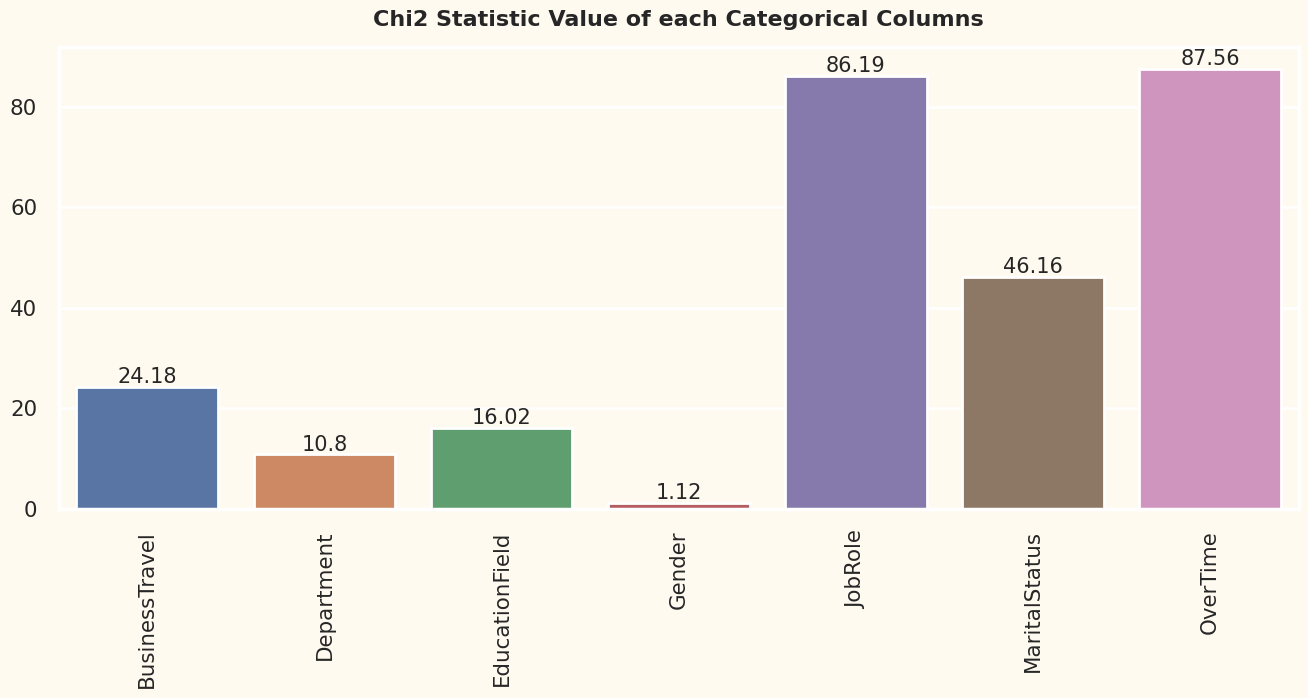

In [74]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [75]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

Features  Chi_2 Statistic                 P_value
0  BusinessTravel        24.182414  0.00000560861447644993
1      Department        10.796007  0.00452560657447963286
2  EducationField        16.024674  0.00677398013902521211
3          Gender         1.116967  0.29057244902890855265
4         JobRole        86.190254  0.00000000000000275248
5   MaritalStatus        46.163677  0.00000000009455511060
6        OverTime        87.564294  0.00000000000000000001

In [76]:
# droping the columns which we have created for analysis purpose
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
df.drop(columns=cols, inplace=True)

In [77]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [78]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [80]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [81]:
encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [82]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())
encoded_df

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                           0.0                               0.0   
1                           0.0                               1.0   
2                           0.0                               0.0   
3                           0.0                               1.0   
4                           0.0                               0.0   
...                         ...                               ...   
1465                        0.0                               1.0   
1466                        0.0                               0.0   
1467                        0.0                               0.0   
1468                        0.0                               1.0   
1469                        0.0                               0.0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                              1.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              1.0                         0.0   
...                            ...                         ...   
1465                           0.0                         0.0   
1466                           1.0                         0.0   
1467                           1.0                         0.0   
1468                           0.0                         0.0   
1469                           1.0                         0.0   

      Department_Research & Development  Department_Sales  \
0                                   0.0               1.0   
1                                   1.0               0.0   
2                                   1.0               0.0   
3                                   1.0               0.0   
4                                   1.0               0.0   
...                                 ...               ...   
1465                                1.0               0.0   
1466                                1.0               0.0   
1467                                1.0               0.0   
1468                                0.0               1.0   
1469                                1.0               0.0   

      EducationField_Human Resources  EducationField_Life Sciences  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           0.0   
3                                0.0                           1.0   
4                                0.0                           0.0   
...                              ...                           ...   
1465                             0.0                           0.0   
1466                             0.0                           0.0   
1467                             0.0                           1.0   
1468                             0.0                           0.0   
1469                             0.0                           0.0   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                          0.0                     0.0                   0.0   
1                          0.0                     0.0                   0.0   
2                          0.0                     0.0                   1.0   
3                          0.0                     0.0                   0.0   
4                          0.0                     1.0                   0.0   
...                        ...                     ...                   ...   
1465                       0.0                     1.0                   0.0   
1466                       0.0                     1.0                   0.0   
1467                       0.0                     0.0                   0.0   
1468      

In [83]:
df = pd.concat([df,encoded_df],axis=1)
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0          0          94               3         2            Sales Executive   
1          1          61               2         2         Research Scientist   
2          1          92               2         1      Laboratory Technician   
3          0          56               3         1         Research Scientist   
4          1          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465       1          41               4         2      Laboratory Technician   
1466       1          42               2         3  Healthcare Representative   
1467       1          87               4         2     Manufacturing Director   
1468       1          63               2         2            Sales Executive   
1469       1          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11              

In [84]:
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

<Axes: title={'center': 'Correlation Plot'}>

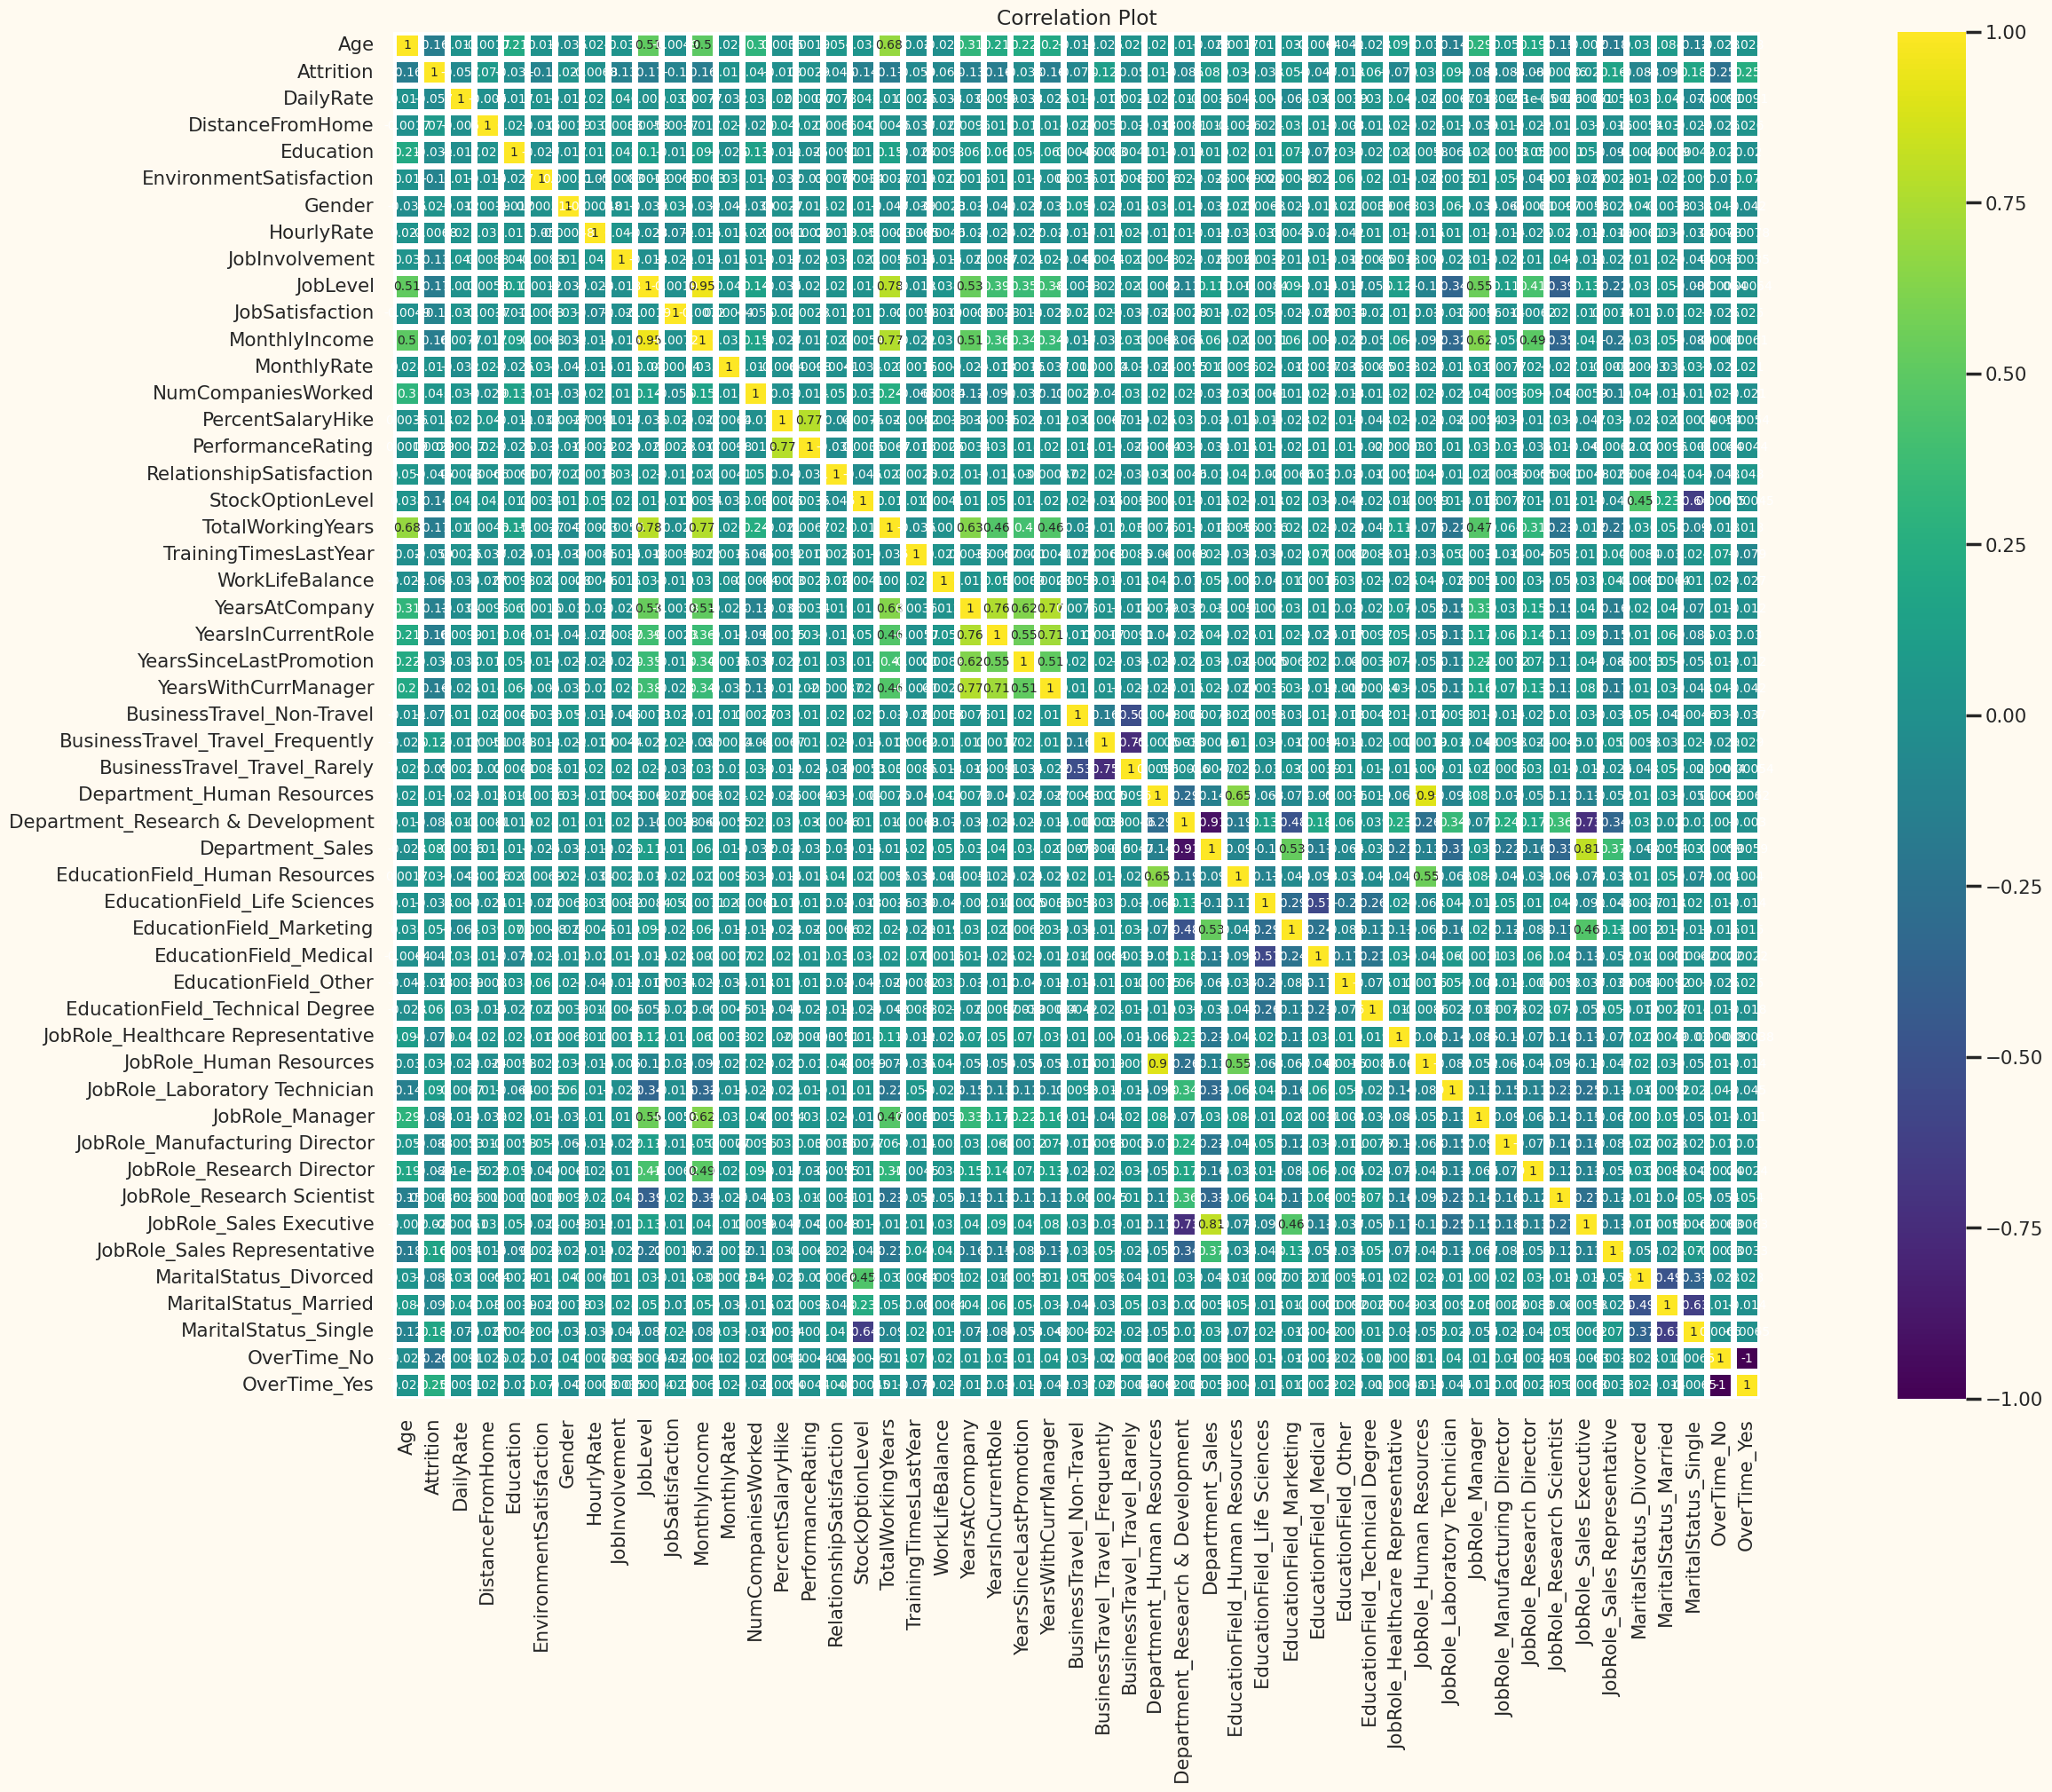

In [86]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='viridis')

In [87]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = (correlation_matrix >= 0.75) & (correlation_matrix < 1.0)

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [88]:
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=cols, inplace=True)

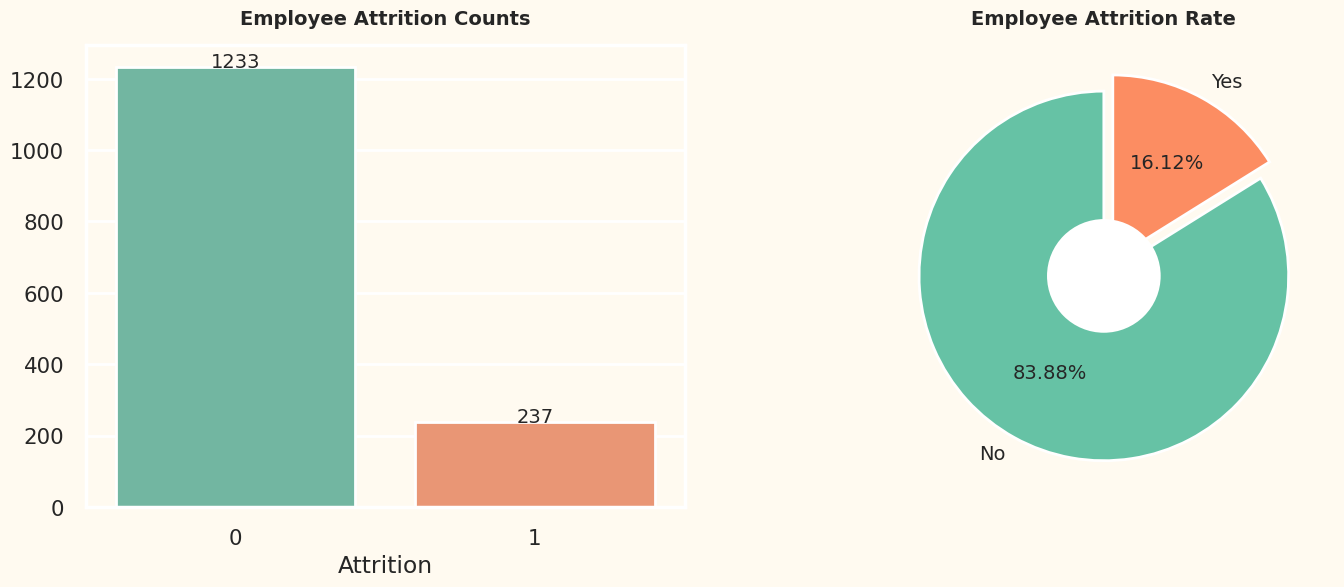

In [89]:
##Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

In [90]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [91]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0            1233
1             237
Name: count, dtype: int64

After Smoote Attrition
0            1233
1            1233
Name: count, dtype: int64


In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [93]:
x_scaled = scaler.fit_transform(x_smote)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [95]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
#from scikeras.wrappers import KerasClassifier


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score # for Gini-mean
from sklearn.metrics import roc_curve


In [97]:
training_score = []
testing_score = []
precission = []
recall = []
Roc_Auc_score = []
f1_score_ = []
kappa_score = []
G_Mean = []

In [98]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    e = roc_auc_score(y_test1, y_test_prob1)
    f = f1_score(y_test1,x_test_pred1)
    g = cohen_kappa_score(y_test1, x_test_pred1)
    h = balanced_accuracy_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"ROC_AUC Score of {model} model is:", e)
    print(f"f1 Score of {model} model is:", f)
    print(f"kappa Score of {model} model is:", g)
    print(f"G_mean Score of {model} model is:", h)
 
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on Training Data is: 85.1419878296146
Accuracy_Score of LogisticRegression() model on Testing Data is: 82.18623481781377
Precision Score of LogisticRegression() model is: 0.8333333333333334
Recall Score of LogisticRegression() model is: 0.7991803278688525
ROC_AUC Score of LogisticRegression() model is: 0.9054754098360656
f1 Score of LogisticRegression() model is: 0.8158995815899582
kappa Score of LogisticRegression() model is: 0.643496801705757
G_mean Score of LogisticRegression() model is: 0.8215901639344263

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       250
           1       0.83      0.80      0.82       244

    accuracy                           0.82       494
   macro avg      

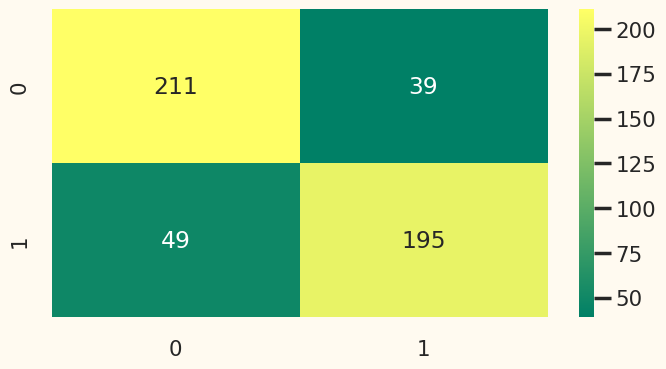


------------------------------------------------------------------------
ROC - AUC Curve of LogisticRegression() model is:


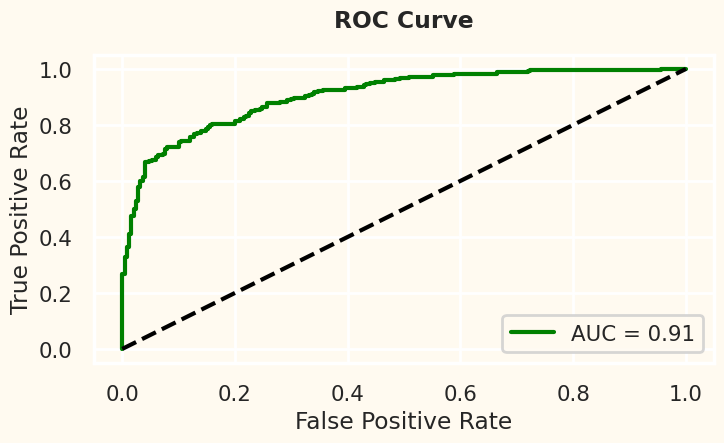

In [99]:
model_prediction(LogisticRegression())


------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on Training Data is: 91.83569979716025
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 89.27125506072875
Precision Score of KNeighborsClassifier() model is: 0.8304498269896193
Recall Score of KNeighborsClassifier() model is: 0.9836065573770492
ROC_AUC Score of KNeighborsClassifier() model is: 0.9540819672131148
f1 Score of KNeighborsClassifier() model is: 0.9005628517823638
kappa Score of KNeighborsClassifier() model is: 0.7858673427660097
G_mean Score of KNeighborsClassifier() model is: 0.8938032786885246

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       250
           1       0.83      0.98      0.90       244

    accuracy                           0.89       49

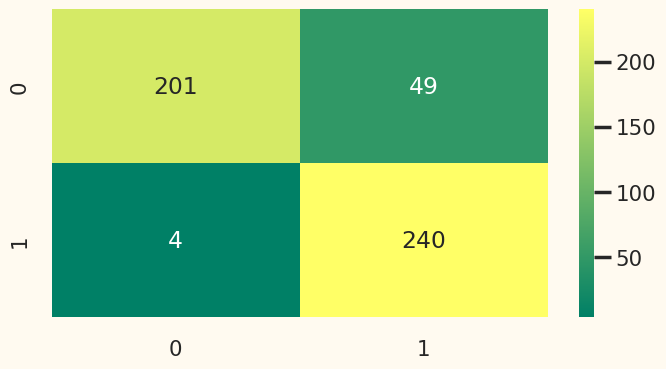


------------------------------------------------------------------------
ROC - AUC Curve of KNeighborsClassifier() model is:


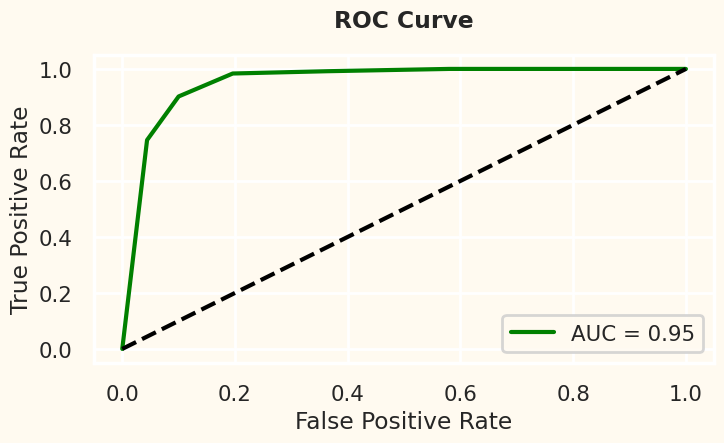

In [100]:
model_prediction(KNeighborsClassifier())


------------------------------------------------------------------------
Accuracy_Score of GaussianNB() model on Training Data is: 76.16632860040568
Accuracy_Score of GaussianNB() model on Testing Data is: 74.69635627530364
Precision Score of GaussianNB() model is: 0.6976744186046512
Recall Score of GaussianNB() model is: 0.860655737704918
ROC_AUC Score of GaussianNB() model is: 0.8492295081967214
f1 Score of GaussianNB() model is: 0.7706422018348624
kappa Score of GaussianNB() model is: 0.49526736525477755
G_mean Score of GaussianNB() model is: 0.748327868852459

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       250
           1       0.70      0.86      0.77       244

    accuracy                           0.75       494
   macro avg       0.76      0.75      0.74       494
weighted avg       0.76      0.75  

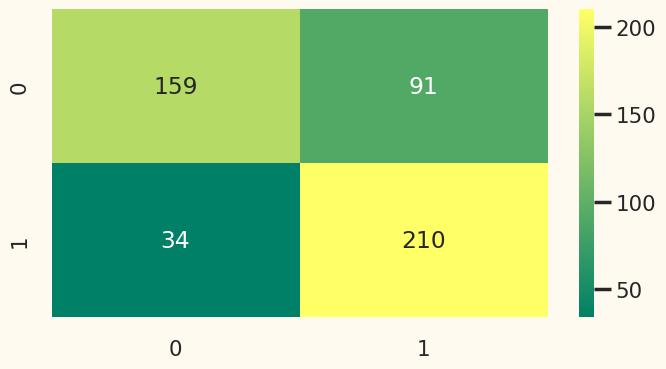


------------------------------------------------------------------------
ROC - AUC Curve of GaussianNB() model is:


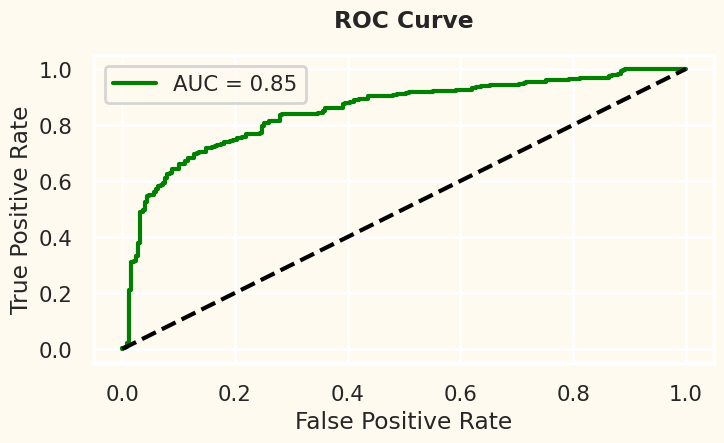

In [101]:
model_prediction(GaussianNB())

In [102]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f = f1_score(y_test,x_test_pred)
    g = cohen_kappa_score(y_test, x_test_pred)
    h = balanced_accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    Roc_Auc_score.append(e)
    f1_score_.append(f)
    kappa_score.append(g)
    G_Mean.append(h)
    
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()



------------------------------------------------------------------------
Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 85.02024291497976
Precision Score of DecisionTreeClassifier() model is: 0.8294573643410853
Recall Score of DecisionTreeClassifier() model is: 0.8770491803278688
AUC Score of DecisionTreeClassifier() model is: 0.8505245901639344

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       250
           1       0.83      0.88      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494


------------------------------------------------------------------------
Confusion Matrix o

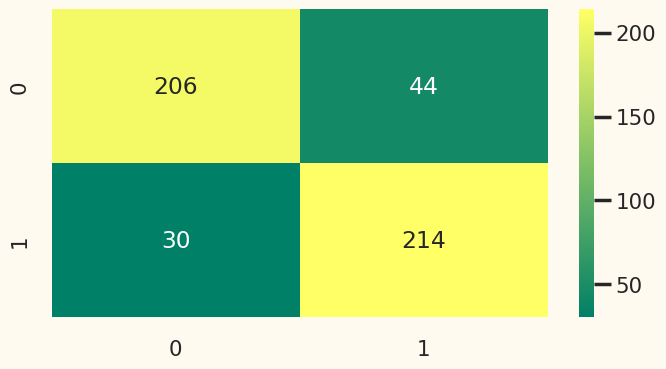


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier() model is:


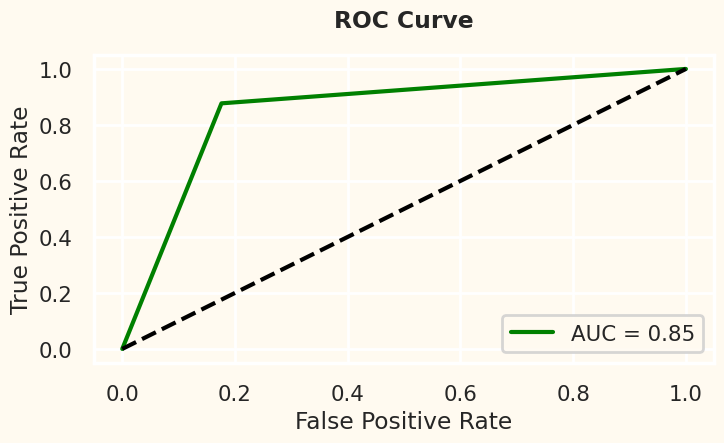

In [103]:
model_prediction(DecisionTreeClassifier())


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 93.11740890688259
Precision Score of RandomForestClassifier() model is: 0.9646017699115044
Recall Score of RandomForestClassifier() model is: 0.8934426229508197
AUC Score of RandomForestClassifier() model is: 0.9781311475409834

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix o

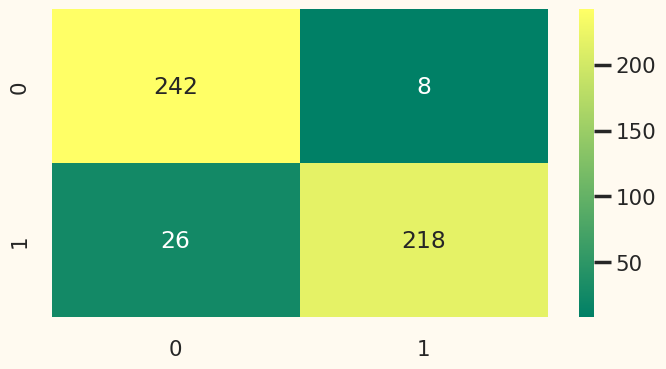


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


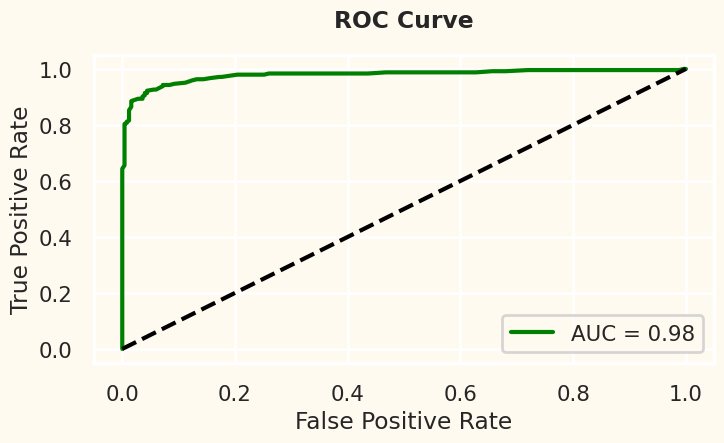

In [104]:
model_prediction(RandomForestClassifier())


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier() model on Training Data is: 93.4077079107505
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 90.68825910931174
Precision Score of AdaBoostClassifier() model is: 0.9159663865546218
Recall Score of AdaBoostClassifier() model is: 0.8934426229508197
AUC Score of AdaBoostClassifier() model is: 0.9552950819672131

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.92      0.89      0.90       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494


------------------------------------------------------------------------
Confusion Matrix of AdaBoostCla

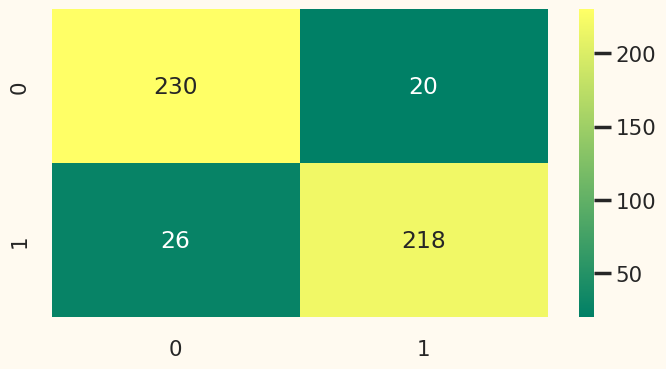


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier() model is:


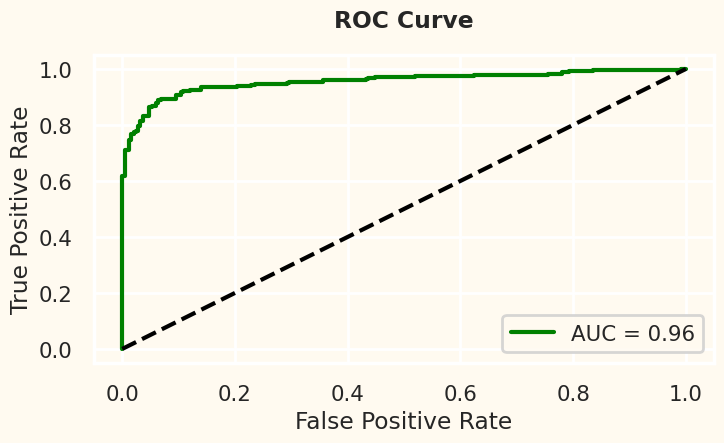

In [105]:
model_prediction(AdaBoostClassifier())


------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 97.05882352941177
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 91.49797570850203
Precision Score of GradientBoostingClassifier() model is: 0.9391304347826087
Recall Score of GradientBoostingClassifier() model is: 0.8852459016393442
AUC Score of GradientBoostingClassifier() model is: 0.9649508196721313

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       250
           1       0.94      0.89      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494


-------------------------------------------------------

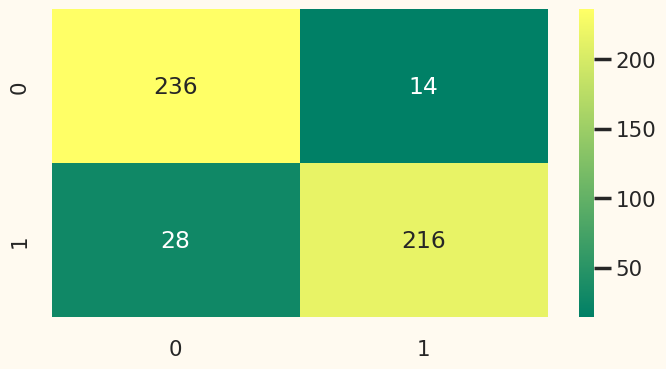


------------------------------------------------------------------------
ROC - AUC Curve of GradientBoostingClassifier() model is:


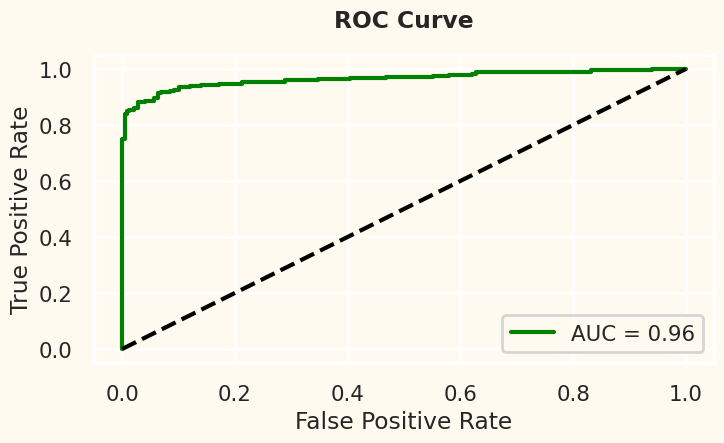

In [106]:
model_prediction(GradientBoostingClassifier())


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, 

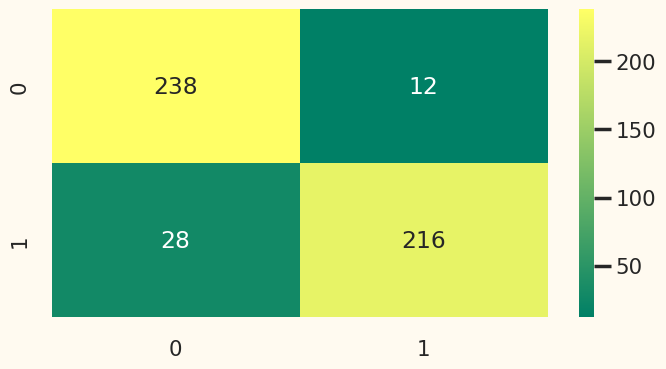


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


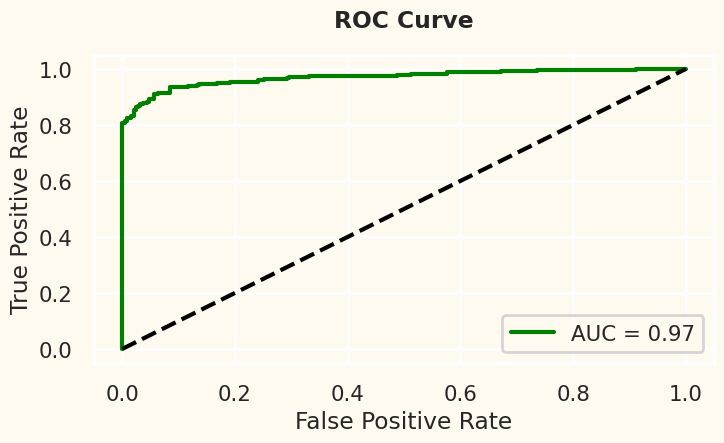

In [107]:
model_prediction(XGBClassifier())

Learning rate set to 0.013768
0:	learn: 0.6797579	total: 56.7ms	remaining: 56.7s
1:	learn: 0.6673661	total: 60.9ms	remaining: 30.4s
2:	learn: 0.6549518	total: 64.8ms	remaining: 21.5s
3:	learn: 0.6455971	total: 68.7ms	remaining: 17.1s
4:	learn: 0.6352412	total: 72.8ms	remaining: 14.5s
5:	learn: 0.6254927	total: 76.6ms	remaining: 12.7s
6:	learn: 0.6174533	total: 80.5ms	remaining: 11.4s
7:	learn: 0.6077146	total: 84.8ms	remaining: 10.5s
8:	learn: 0.5986069	total: 89.2ms	remaining: 9.82s
9:	learn: 0.5895354	total: 93.6ms	remaining: 9.26s
10:	learn: 0.5800540	total: 98ms	remaining: 8.81s
11:	learn: 0.5720474	total: 102ms	remaining: 8.41s
12:	learn: 0.5640416	total: 106ms	remaining: 8.08s
13:	learn: 0.5565057	total: 110ms	remaining: 7.78s
14:	learn: 0.5460633	total: 115ms	remaining: 7.52s
15:	learn: 0.5374194	total: 119ms	remaining: 7.3s
16:	learn: 0.5313116	total: 123ms	remaining: 7.11s
17:	learn: 0.5261938	total: 127ms	remaining: 6.92s
18:	learn: 0.5196939	total: 131ms	remaining: 6.75s
19:

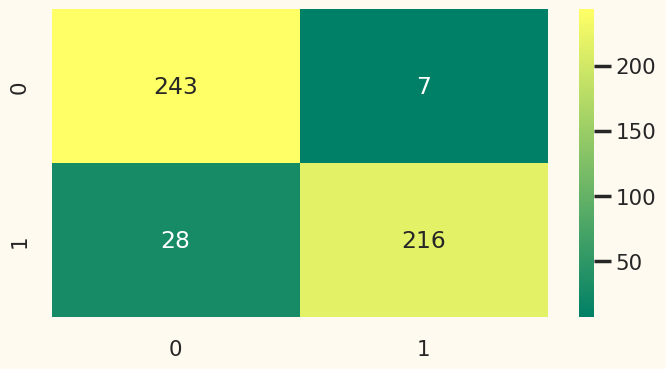


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x7f9a707e16f0> model is:


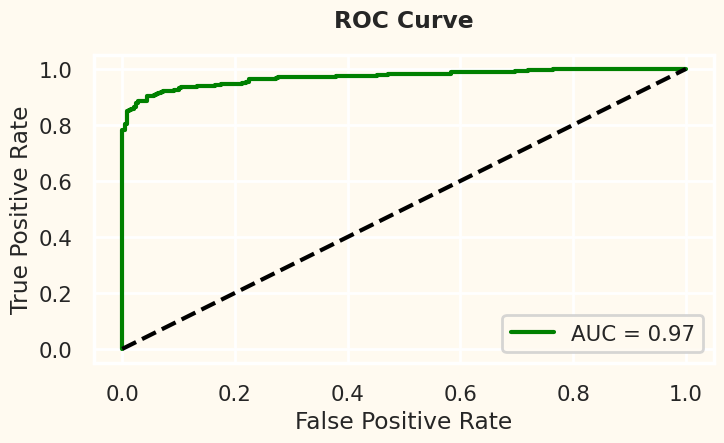

In [108]:
model_prediction(CatBoostClassifier())


------------------------------------------------------------------------
Accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
Accuracy_Score of LGBMClassifier() model on Testing Data is: 91.29554655870446
Precision Score of LGBMClassifier() model is: 0.9547511312217195
Recall Score of LGBMClassifier() model is: 0.8647540983606558
AUC Score of LGBMClassifier() model is: 0.968344262295082

------------------------------------------------------------------------
Classification Report of LGBMClassifier() model is:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       250
           1       0.95      0.86      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494


------------------------------------------------------------------------
Confusion Matrix of LGBMClassifier() model is:


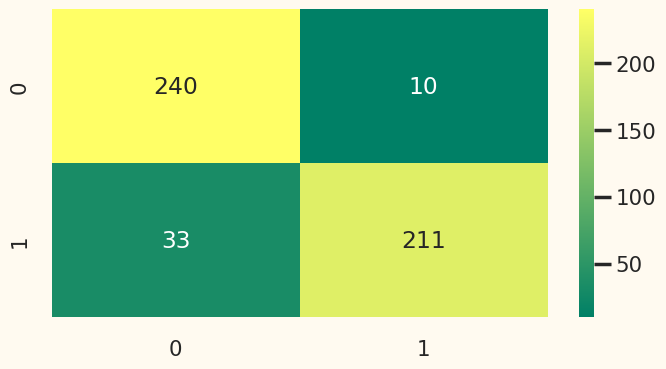


------------------------------------------------------------------------
ROC - AUC Curve of LGBMClassifier() model is:


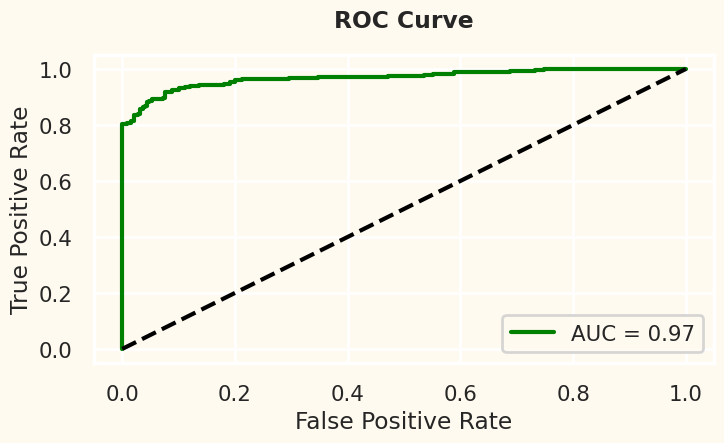

In [109]:
model_prediction(LGBMClassifier())

In [110]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost","LGBM classifier"]

In [111]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})


In [112]:
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0  Logistic Regression       85.141988      82.186235   0.833333  0.799180   
1                  KNN       91.835700      89.271255   0.830450  0.983607   
2          Naive Bayes       76.166329      74.696356   0.697674  0.860656   
3        Decision Tree      100.000000      85.020243   0.829457  0.877049   
4        Random Forest      100.000000      93.117409   0.964602  0.893443   
5            Ada Boost       93.407708      90.688259   0.915966  0.893443   
6       Gradient Boost       97.058824      91.497976   0.939130  0.885246   
7              XGBoost      100.000000      91.902834   0.947368  0.885246   
8             CatBoost       99.594320      92.914980   0.968610  0.885246   
9      LGBM classifier      100.000000      91.295547   0.954751  0.864754   

   ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0       0.905475  0.815900     0.643497  0.821590  
1       0.954082  0.900563     0.785867  0.893803  
2       0.849230  0.770642     0.495267  0.748328  
3       0.850525  0.852590     0.700567  0.850525  
4       0.978131  0.927660     0.862206  0.930721  
5       0.955295  0.904564     0.813683  0.906721  
6       0.964951  0.911392     0.829817  0.914623  
7       0.970197  0.915254     0.837905  0.918623  
8       0.971049  0.925054     0.858132  0.928623  
9       0.968344  0.907527     0.825688  0.912377

In [113]:
# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 10, 2000, log=True),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 100, log=True),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 20.0, log=True),
#         'random_strength': trial.suggest_float('random_strength', 1.0, 2.0),
#         'depth': trial.suggest_int('depth', 1, 10),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
#         'task_type': 'GPU',
#         'random_seed': 1,
#         'verbose': False
#     }

#     try:
#         cb = CatBoostClassifier(**params)

#         # Train the model
#         cb.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=100)

#         # Make the predictions
#         y_pred = cb.predict(x_test)

#         # Calculate accuracy
#         accuracy = accuracy_score(y_test, y_pred)

#         return accuracy
#     except CatBoostError as e:
#         # Handle CatBoostError by returning a low accuracy
#         print(f"Trial {trial.number} failed with CatBoostError: {e}")
#         return 0.0  # You can adjust this value based on your preference

# # Create the Optuna study
# study_catboost = optuna.create_study(direction='maximize')
# study_catboost.optimize(objective, n_trials=30)

# #Print the best hyperparameters and test accuracy
# print('Best hyperparameters:', study_catboost.best_params)
# print('Best Test Accuracy:', study_catboost.best_value)

In [114]:
catboost_Best_hyperparameters = {'iterations': 651,
                                 'learning_rate': 0.03356857796503744, 
                                 'l2_leaf_reg': 8.68165684728472, 
                                 'bagging_temperature': 7.120978423676909,
                                 'random_strength': 1.9940130782713084,
                                 'depth': 7, 'min_data_in_leaf': 122}

0:	learn: 0.6706517	total: 9.74ms	remaining: 6.33s
1:	learn: 0.6506783	total: 16.4ms	remaining: 5.32s
2:	learn: 0.6339739	total: 22.7ms	remaining: 4.89s
3:	learn: 0.6160074	total: 28.8ms	remaining: 4.65s
4:	learn: 0.5990592	total: 34.3ms	remaining: 4.43s
5:	learn: 0.5838755	total: 39.8ms	remaining: 4.28s
6:	learn: 0.5668740	total: 46ms	remaining: 4.23s
7:	learn: 0.5527680	total: 52.2ms	remaining: 4.19s
8:	learn: 0.5341395	total: 57.8ms	remaining: 4.13s
9:	learn: 0.5201620	total: 63.3ms	remaining: 4.06s
10:	learn: 0.5087048	total: 69ms	remaining: 4.01s
11:	learn: 0.4978336	total: 74.4ms	remaining: 3.96s
12:	learn: 0.4859873	total: 79.8ms	remaining: 3.92s
13:	learn: 0.4767062	total: 85.5ms	remaining: 3.89s
14:	learn: 0.4667440	total: 93.3ms	remaining: 3.96s
15:	learn: 0.4550427	total: 98.8ms	remaining: 3.92s
16:	learn: 0.4458938	total: 105ms	remaining: 3.9s
17:	learn: 0.4388428	total: 110ms	remaining: 3.88s
18:	learn: 0.4301844	total: 116ms	remaining: 3.86s
19:	learn: 0.4226536	total: 12

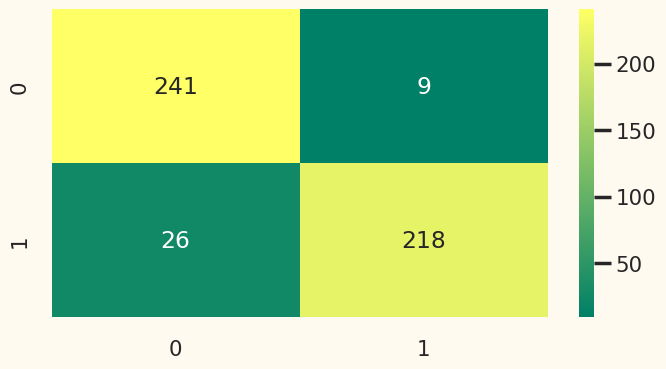


------------------------------------------------------------------------
ROC - AUC Curve of <catboost.core.CatBoostClassifier object at 0x7f9a70a00760> model is:


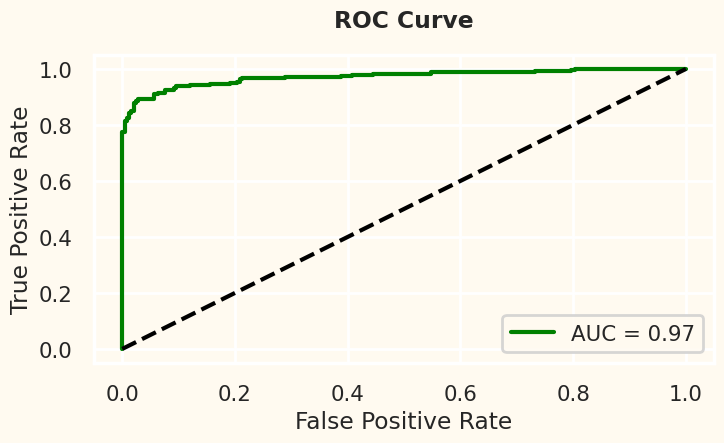

In [115]:
model_prediction(CatBoostClassifier(**catboost_Best_hyperparameters))

In [116]:
RANDOM_SEED = np.random.seed(42)

In [117]:
# '''def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
#         'max_depth': trial.suggest_int('max_depth', 2, 15),
#         'eta': trial.suggest_float('eta', 0.001, 0.1, log=True),
#         'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.05, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
#         'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     }

#     # Build the xgboost model
#     optuna_xgbmodel = XGBClassifier(**params, random_state=RANDOM_SEED)
    
#     # Train the model 
#     optuna_xgbmodel.fit(x_train, y_train)
    
#     # Make the predictions
#     y_pred = optuna_xgbmodel.predict(x_test)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy

# # Create the Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Print the best hyperparameters and test accuracy
# print('Best hyperparameters:', study.best_params)
# print('Best Test Accuracy:', study.best_value)
# '''

In [118]:
XGboost_Best_hyperparameters = {'alpha': 1.0828869784295189e-08, 
                                'max_depth': 9, 'eta': 0.03353768080985071,
                                'gamma': 0.7309121971687413,
                                'colsample_bytree': 0.7618126951504659, 
                                'subsample': 0.4105603727766567, 
                                'min_child_weight': 2, 
                                'n_estimators': 584, 
                                'learning_rate': 0.06693301582532778,
                                'reg_alpha': 0.9517264929620095, 
                                'reg_lambda': 0.7693580310442778}


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model on Training Data is: 98.78296146044624
Accuracy_Score of XGBClassifier(alpha=1.0828869784295189e

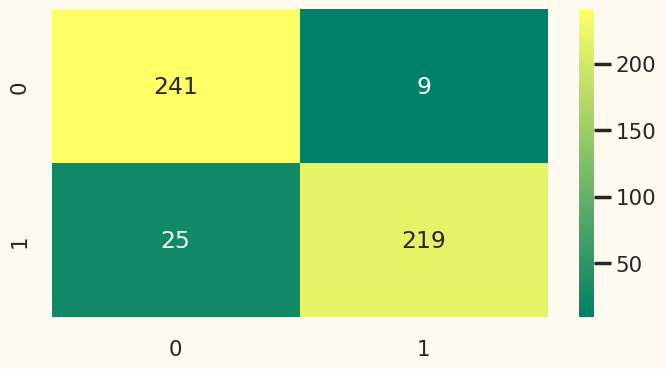


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(alpha=1.0828869784295189e-08, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7618126951504659, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03353768080985071, eval_metric=None, feature_types=None,
              gamma=0.7309121971687413, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06693301582532778,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=584, n_jobs=None, ...) model is:


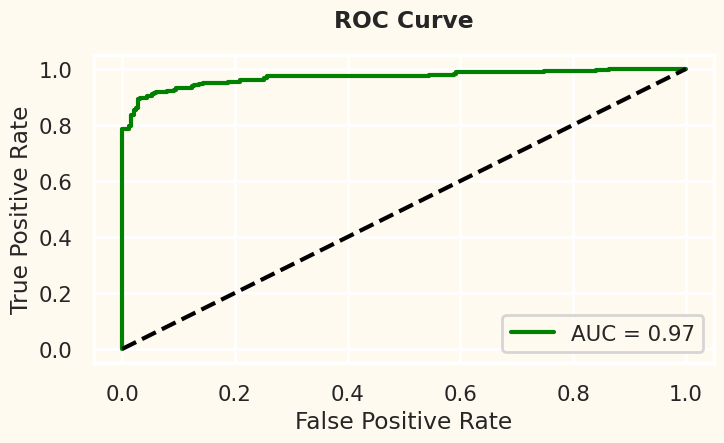

In [119]:
model_prediction(XGBClassifier(**XGboost_Best_hyperparameters, random_state=RANDOM_SEED))

In [120]:
# '''# Define the objective function for Optuna
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
#         #'base_estimator__max_depth': trial.suggest_int('base_estimator__max_depth', 1, 10),
#         #'base_estimator__min_samples_split': trial.suggest_int('base_estimator__min_samples_split', 2, 20),
#         #'base_estimator__min_samples_leaf': trial.suggest_int('base_estimator__min_samples_leaf', 1, 10)
#     }

#     # Build the AdaBoost model
#     adaboost_model = AdaBoostClassifier(**params, random_state=RANDOM_SEED)
    
#     # Evaluate the model using cross-validation
#     accuracy_scorer = make_scorer(accuracy_score)
#     accuracies = cross_val_score(adaboost_model, x_train, y_train, cv=5, scoring=accuracy_scorer)

#     # Return the average accuracy as the objective value
#     return accuracies.mean()

# # Create the Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Print the best hyperparameters and test accuracy
# print('Best hyperparameters:', study.best_params)
# print('Best Test Accuracy:', study.best_value)
# '''


In [121]:
Adaboost_Best_hyperparameters = {'n_estimators': 366, 'learning_rate': 0.9937295407270483, 'algorithm': 'SAMME'}


------------------------------------------------------------------------
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Training Data is: 94.01622718052738
Accuracy_Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model on Testing Data is: 91.7004048582996
Precision Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9432314410480349
Recall Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.8852459016393442
AUC Score of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is: 0.9613114754098361

------------------------------------------------------------------------
Classification Report of AdaBoostClassifier(algo

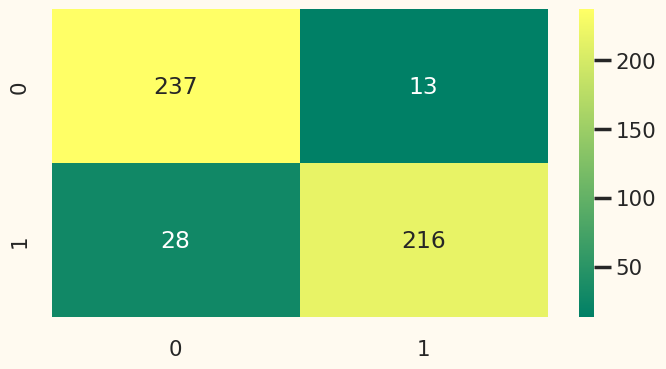


------------------------------------------------------------------------
ROC - AUC Curve of AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9937295407270483,
                   n_estimators=366) model is:


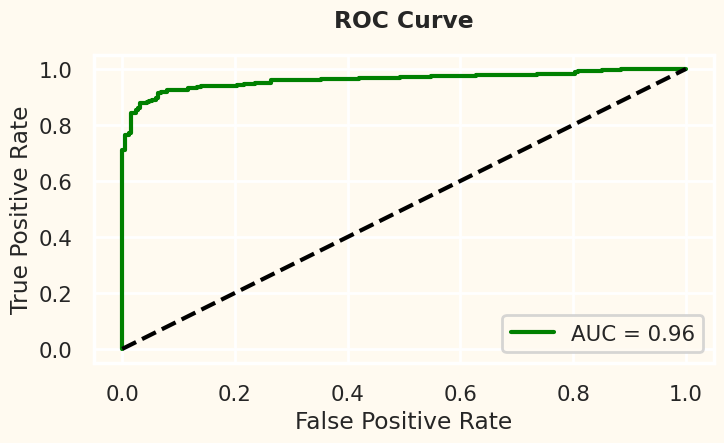

In [122]:
model_prediction(AdaBoostClassifier(**Adaboost_Best_hyperparameters))

In [123]:
import keras_tuner as kt

In [124]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    
    optimizer=hp.Choice('optimizer', values = ['adam','sgd','rmsprop','adadelta'])
                        
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [125]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                       max_trials=5)

In [126]:
tuner.search(x_train,y_train,epochs=5,validation_data=( x_test,y_test))

Trial 4 Complete [00h 00m 05s]
val_accuracy: 0.6133603453636169

Best val_accuracy So Far: 0.6295546293258667
Total elapsed time: 00h 00m 21s


In [127]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [128]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value = 8, max_value = 128 )
    model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [129]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                       max_trials=5)

In [130]:
tuner.search(x_train,y_train,epochs = 5,validation_data=(x_test,y_test))

In [131]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [132]:
model = Sequential()

In [133]:
model.add(Dense(20,activation='relu',input_dim = 45,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(Dense(15,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                920       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 batch_normalization_2 (Bat  (None, 15)                60        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 batch_normalization_3 (Bat  (None, 10)                40        
 chNormalization)                                     

In [135]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

In [136]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint("Employe_Attrition.h5", save_best_only=True)
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
#tensorboard_cb = tensorflow.keras.callbacks.TensorBoard(log_dir="logs")

#CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]
CALLBACKS = [checkpoint_cb, early_stopping_cb]

history = model.fit(x_train1,y_train1,epochs=35,validation_split=0.2,callbacks = CALLBACKS)

Epoch 1/35
50/50 [==============================] - 3s 10ms/step - loss: 1.0142 - accuracy: 0.5384 - val_loss: 0.7841 - val_accuracy: 0.5747
Epoch 2/35
50/50 [==============================] - 0s 6ms/step - loss: 0.8402 - accuracy: 0.5954 - val_loss: 0.7431 - val_accuracy: 0.6278
Epoch 3/35
50/50 [==============================] - 0s 6ms/step - loss: 0.8137 - accuracy: 0.6005 - val_loss: 0.6986 - val_accuracy: 0.7063
Epoch 4/35
50/50 [==============================] - 0s 6ms/step - loss: 0.7613 - accuracy: 0.6303 - val_loss: 0.6573 - val_accuracy: 0.7494
Epoch 5/35
50/50 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.7045 - val_loss: 0.6212 - val_accuracy: 0.7797
Epoch 6/35
50/50 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.6975 - val_loss: 0.5872 - val_accuracy: 0.8051
Epoch 7/35
50/50 [==============================] - 0s 6ms/step - loss: 0.6315 - accuracy: 0.7273 - val_loss: 0.5566 - val_accuracy: 0.8354
Epoch 8/35
50/50 [=

In [137]:
model.layers[0].get_weights()

[array([[-9.67970341e-02, -2.12894310e-03,  7.92843774e-02,
          1.58311352e-01, -2.34548631e-03, -1.01464149e-02,
         -2.03482620e-02, -1.95063762e-02, -1.03778727e-01,
          2.46525910e-02,  1.29630029e-01, -4.28045690e-01,
          1.10827357e-01,  9.85288993e-02, -8.35788772e-02,
         -2.32733954e-02,  3.82256098e-02,  1.36938021e-01,
          2.43927404e-01, -4.15269611e-03],
        [ 2.61138141e-01, -1.47111714e-01, -1.55841663e-01,
          1.79825500e-02,  2.75911689e-01, -4.04993266e-01,
          1.45718589e-01, -1.10631295e-01, -1.11590521e-02,
          2.38022223e-01,  1.69815227e-01, -1.53431967e-01,
         -7.57552832e-02, -1.01188108e-01, -7.00398767e-03,
          7.34686553e-02, -1.01537623e-01, -4.41866810e-04,
          2.52637297e-01,  1.61140278e-01],
        [-1.57119811e-01, -1.62443787e-01,  8.18849206e-02,
         -1.78395718e-01, -1.50136039e-01, -6.90454766e-02,
          1.23153301e-02, -2.66508013e-01,  2.25933418e-01,
         -2.

In [138]:
y_log = model.predict(x_test1)

16/16 [==============================] - 0s 2ms/step


In [139]:
y_pred = np.where(y_log>0.5,1,0)

In [140]:
accuracy_score(y_test1,y_pred)

0.8623481781376519

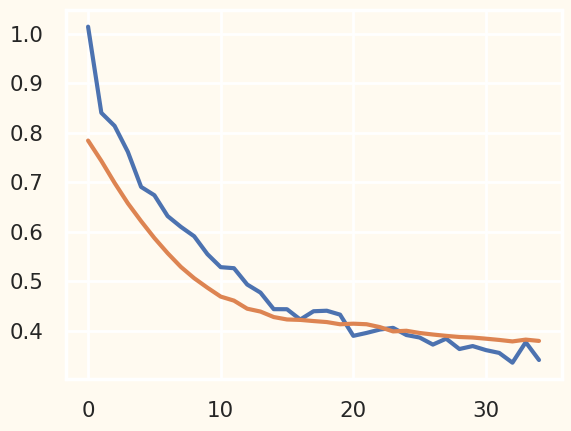

In [141]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

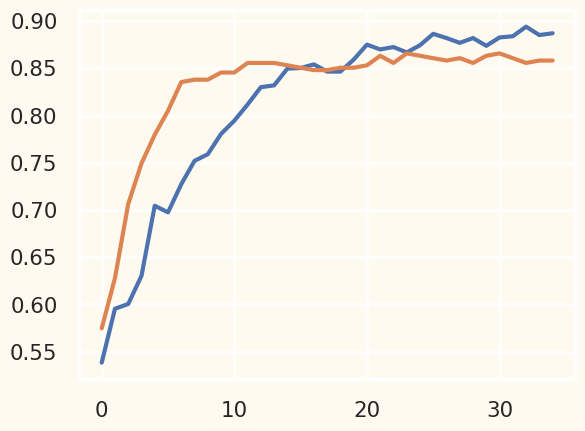

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<Axes: >

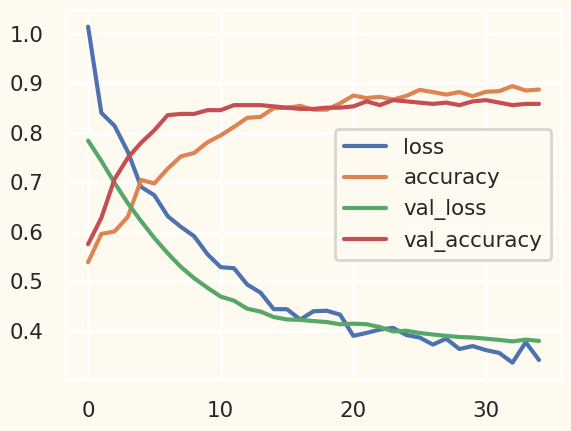

In [143]:
pd.DataFrame(history.history).plot()

In [144]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train,y_train)
GB_Model = GradientBoostingClassifier()
GB_Model.fit(x_train,y_train)

GradientBoostingClassifier()

In [145]:
ensemble_model = VotingClassifier(
    estimators=[
        ('adb', adaboost_model),
        ('gb', GB_Model),
        #('ANN',model)
    ],
    voting='soft'
)

# Use accuracy as the scoring parameter
accuracy_scores = cross_val_score(ensemble_model, x_train, y_train, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", accuracy_scores.mean())

Accuracy scores for each fold: [0.92151899 0.92405063 0.93654822 0.90862944 0.92385787]
Average accuracy: 0.9229210306496178



------------------------------------------------------------------------
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Training Data is: 96.85598377281947
Accuracy_Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model on Testing Data is: 91.7004048582996
Precision Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.9393939393939394
Recall Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is: 0.889344262295082
AUC Score of VotingClassifier(estimators=[('adb', AdaBoostClassifier()

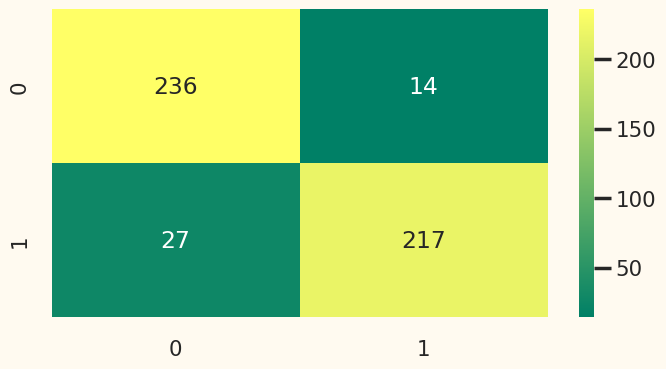


------------------------------------------------------------------------
ROC - AUC Curve of VotingClassifier(estimators=[('adb', AdaBoostClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft') model is:


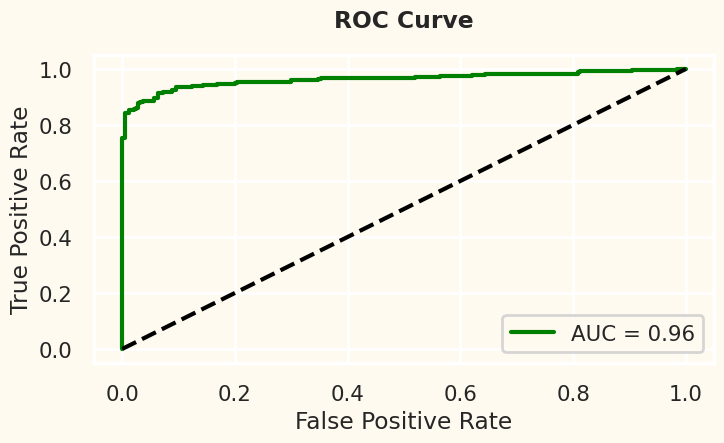

In [146]:
model_prediction(ensemble_model)

In [147]:
models = ["Logistic Regression","KNN","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost","LGBM classifier","CatBoost_optimised","XGboost_optimised",'Adaboost_optimised',"Ensemble_Model"]

df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Precision": precission,
                   "Recall": recall,
                   "ROC_AUC Score": Roc_Auc_score,
                   "f1_Score": f1_score_,
                   "Kappa_Score": kappa_score,
                   "G_Mean": G_Mean})

In [148]:
df

Algorithms  Training Score  Testing Score  Precision    Recall  \
0   Logistic Regression       85.141988      82.186235   0.833333  0.799180   
1                   KNN       91.835700      89.271255   0.830450  0.983607   
2           Naive Bayes       76.166329      74.696356   0.697674  0.860656   
3         Decision Tree      100.000000      85.020243   0.829457  0.877049   
4         Random Forest      100.000000      93.117409   0.964602  0.893443   
5             Ada Boost       93.407708      90.688259   0.915966  0.893443   
6        Gradient Boost       97.058824      91.497976   0.939130  0.885246   
7               XGBoost      100.000000      91.902834   0.947368  0.885246   
8              CatBoost       99.594320      92.914980   0.968610  0.885246   
9       LGBM classifier      100.000000      91.295547   0.954751  0.864754   
10   CatBoost_optimised       99.949290      92.914980   0.960352  0.893443   
11    XGboost_optimised       98.782961      93.117409   0.960526  0.897541   
12   Adaboost_optimised       94.016227      91.700405   0.943231  0.885246   
13       Ensemble_Model       96.855984      91.700405   0.939394  0.889344   

    ROC_AUC Score  f1_Score  Kappa_Score    G_Mean  
0        0.905475  0.815900     0.643497  0.821590  
1        0.954082  0.900563     0.785867  0.893803  
2        0.849230  0.770642     0.495267  0.748328  
3        0.850525  0.852590     0.700567  0.850525  
4        0.978131  0.927660     0.862206  0.930721  
5        0.955295  0.904564     0.813683  0.906721  
6        0.964951  0.911392     0.829817  0.914623  
7        0.970197  0.915254     0.837905  0.918623  
8        0.971049  0.925054     0.858132  0.928623  
9        0.968344  0.907527     0.825688  0.912377  
10       0.971787  0.925690     0.858160  0.928721  
11       0.969902  0.927966     0.862219  0.930770  
12       0.961311  0.913319     0.833861  0.916623  
13       0.963541  0.913684     0.833877  0.916672

In [149]:
# metrics_to_plot = ["Training Score", "Testing Score", "Precision", "Recall", "ROC_AUC Score", "f1_Score", "Kappa_Score", "G_Mean"]

# # Create subplots
# fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(12, 6*len(metrics_to_plot)))

# # Plot each metric for every algorithm
# for i, metric in enumerate(metrics_to_plot):
#     axes[i].bar(df["Algorithms"], df[metric])
#     axes[i].set_ylabel(metric)
#     axes[i].set_title(f"{metric} for each algorithm")
#     axes[i].tick_params(axis='x', rotation=45)
# plt.tight_layout()
# plt.show()


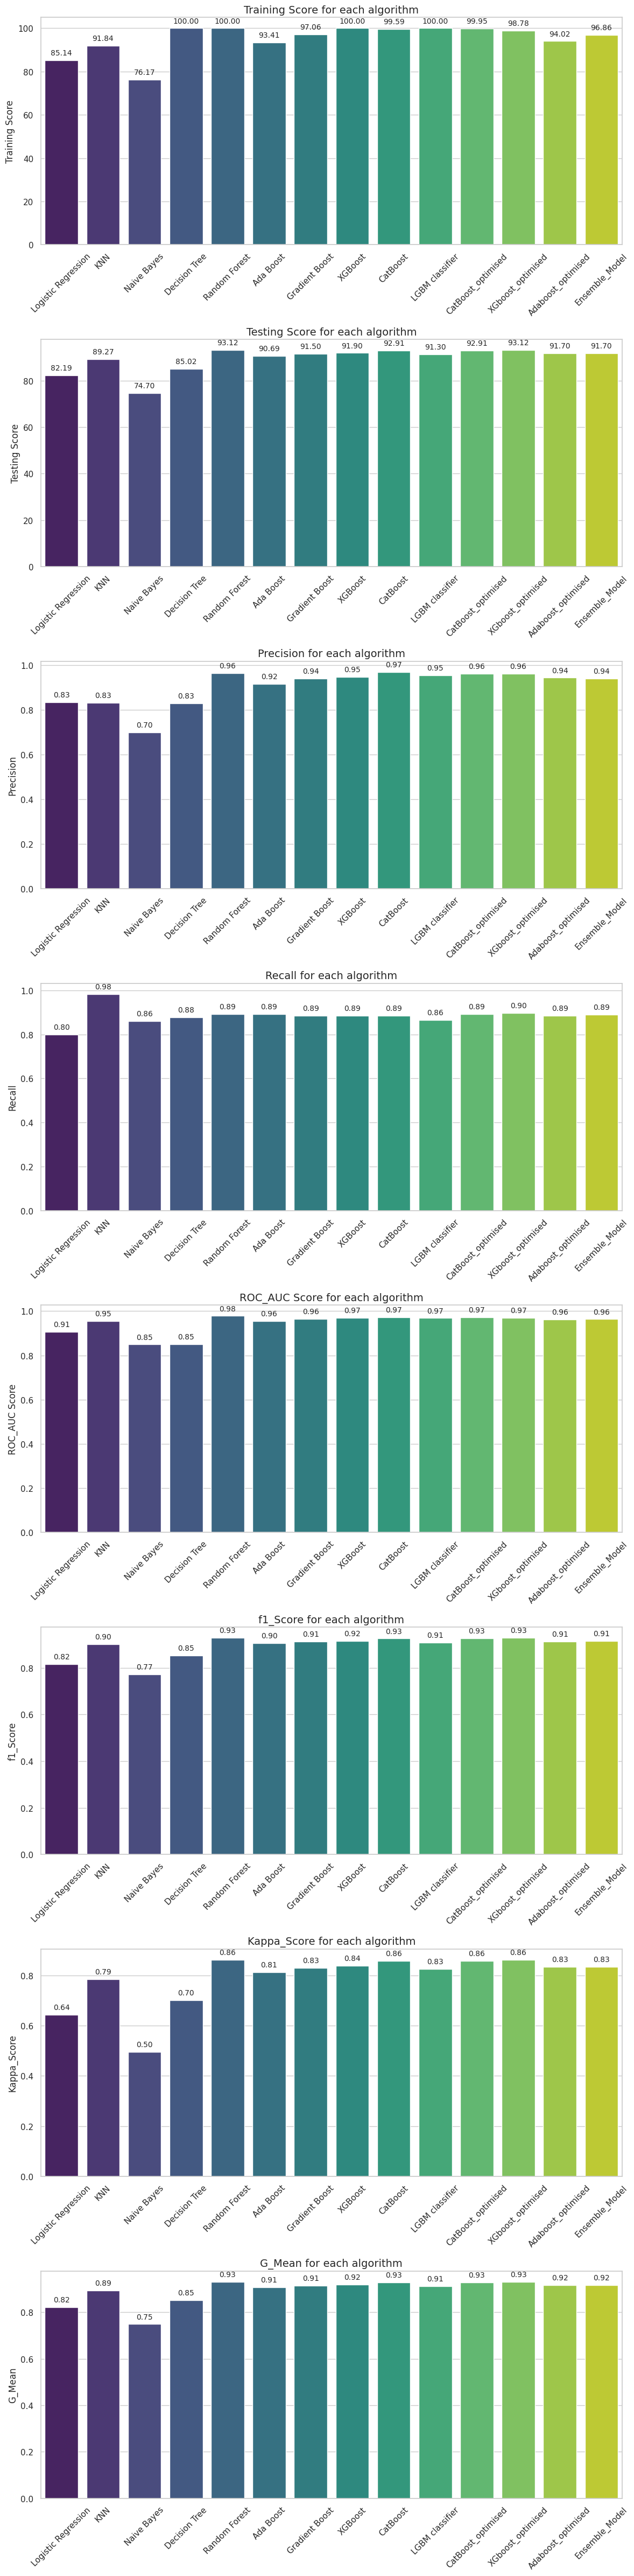

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Set seaborn style
sns.set(style="whitegrid")

# Define metrics to plot
metrics_to_plot = ["Training Score", "Testing Score", "Precision", "Recall", "ROC_AUC Score", "f1_Score", "Kappa_Score", "G_Mean"]

# Create subplots
fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(12, 6*len(metrics_to_plot)))

# Iterate through each metric and plot
for i, metric in enumerate(metrics_to_plot):
    # Use seaborn barplot for better aesthetics
    sns.barplot(x="Algorithms", y=metric, data=df, ax=axes[i], palette="viridis")
    
    # Set labels and title
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for better clarity
    axes[i].set_title(f"{metric} for each algorithm", fontsize=14)
    
    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add data values on top of the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
